<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Adolfo Fuentes </em><br>

</div>

### **Tarea Final. Ciencia de Redes**

*10 de Enero de 2025*

#### Integrantes: 
` Gabriel Álvarez, Giuseppe Lavarello, Ingrid Solís, Rosario Valderrama `

## 1. Objetivos:

Se trabajará con los datos de servicios y destinos turísticos de la región de los Ríos. El objetivo principal del trabajo es construir, analizar y extraer información valiosa de una red bipartita basada en datos de visitas turísticas de la región de Los Ríos, con un enfoque en la inferencia de patrones significativos.

El análisis de redes es una herramienta poderosa para, en este caso, comprender y modelar las relaciones complejas entre usuarios y destinos turísticos. 

Para el análisis, será importante considerar lo siguiente:

#### Análisis Exploratorio de Datos:

- Explorar y describir el conjunto de datos utilizando herramientas estadísticas y visuales: histogramas, analizar relaciones bivariadas entre variables relevantes, calcular y visualizazr correlaciones entre las variables.

#### Inferencia de la Red:

- Construir una red bipartita que conecte usuarios y destinos turísticos, donde los enlaces reflejen interacciones como visitas o calificaciones.

- Generar proyecciones unimodales de la red bipartita, para analizar usuarios conectados por destintos compartidos o analizar destinos conectados por  usuarios comunes.

- Aplicar modelos nulos para filtrar relaciones débiles, asegurando que las conexiones retenidas sean estadísticamente significativas.

#### Descripción de la Red:

- Caracterizar la red original y las redes proyectadas mediante:

      - Distribución de grados antes y después de filtrar
      - Calcular el coeficiente de clustering para evaluar la cohesión de la red
      - Medir densidad y número de nodos y enlaces de la red
  
- Detectar comunidades dentro de las redes proyectadas utilizando algoritmos de modularidad, analizando sus características y posibles implicancias.

#### Identificación de Patrones en la Red:

- Identificar patrones relevantes en la red proyectada, como nodos clave (hubs) o centralidad, relaciones frecuentes entre destinos turísticos que indiquen co-visitas significativas.

- Analizar las comunidades detectadas para entender preferencias compartidas entre usuarios.

#### Objetivo Final

- Evaluar cómo los patrones y métricas extraídos de la red pueden aplicarse en la creación de sistemas de recomendación personalizados para los usuarios.

- Proponer estrategias basadas en los hallazgos para optimizar la gestión turística, fomentar la diversificación de destinos y promover la sostenibilidad en el sector.


## 2. Introducción:

El turismo en Chile es una actividad fundamental para su desarrollo económico, social y cultural. Destinos como la Feria Fluvial de Valdivia, el Parque Saval y el Castillo San Sebastián de la Cruz destacan no solo por su relevancia histórica y natural, sino también por su capacidad de atraer a viajeros de diversas regiones. Sin embargo, en un contexto global que exige adaptabilidad tras la pandemia de COVID-19, la digitalización y el uso de tecnologías innovadoras han tomado un rol central para impulsar la competitividad del sector. En este escenario, comprender las dinámicas entre los turistas y los destinos que visitan se ha convertido en una prioridad para diseñar estrategias que optimicen la experiencia turística y promuevan la sostenibilidad del sector.

La ciencia de redes ha emergido como una herramienta poderosa para analizar patrones y relaciones en sistemas complejos, como las interacciones entre turistas y destinos. Al modelar estas interacciones como una red bipartita que conecta a los usuarios con los lugares que visitan, es posible identificar nodos clave, comunidades de interés y relaciones significativas que aporten a la toma de decisiones informadas en la industria turística. Estos modelos también permiten incorporar tecnologías avanzadas, como los sistemas de recomendación personalizados, que han transformado la forma en que los viajeros planifican sus experiencias, mejorando su satisfacción y fortaleciendo la fidelidad hacia destinos específicos.

Este trabajo tiene como objetivo principal construir y analizar una red bipartita basada en datos de visitas y reseñas de usuarios en destinos turísticos chilenos. A partir de esta red, se realizarán proyecciones unimodales y se aplicarán modelos nulos para filtrar relaciones débiles y revelar patrones significativos en la estructura de la red. Estos hallazgos no solo permitirán explorar el comportamiento turístico, sino también proponer estrategias tecnológicas, como sistemas de recomendación, que optimicen la gestión de destinos y fomenten el desarrollo local en un marco de sostenibilidad.

## 3. Análisis Exploratorio de Datos:

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import math
import nltk
import string
from itertools import compress
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [15]:
df_base = pd.read_excel("./Redes_coocurrencia.xlsx").reset_index()
df_base = df_base.rename({'index':'Id'}, axis='columns')

Se utiliza la base de datos considerando los usuarios que han realizado un review en más de 1 lugar, los que no, fueron eliminados. 

In [17]:
df_base

Id     N                     place_id                 place_name  \
0            0    89  ChIJS5lcdLBVEZYRFa_Y_RuCV1g      Restaurant Puerto Fuy   
1            1    89  ChIJS5lcdLBVEZYRFa_Y_RuCV1g      Restaurant Puerto Fuy   
2            2    89  ChIJS5lcdLBVEZYRFa_Y_RuCV1g      Restaurant Puerto Fuy   
3            3    89  ChIJS5lcdLBVEZYRFa_Y_RuCV1g      Restaurant Puerto Fuy   
4            4    89  ChIJS5lcdLBVEZYRFa_Y_RuCV1g      Restaurant Puerto Fuy   
...        ...   ...                          ...                        ...   
356470  356470  1426  ChIJVUByRLjvFZYR6l2n1fKNaAQ  Bosque humedal Angachilla   
356471  356471  1426  ChIJVUByRLjvFZYR6l2n1fKNaAQ  Bosque humedal Angachilla   
356472  356472  1426  ChIJVUByRLjvFZYR6l2n1fKNaAQ  Bosque humedal Angachilla   
356473  356473  1426  ChIJVUByRLjvFZYR6l2n1fKNaAQ  Bosque humedal Angachilla   
356474  356474  1426  ChIJVUByRLjvFZYR6l2n1fKNaAQ  Bosque humedal Angachilla   

                   id_usuario  stars  \
0       100519139671583772741      4   
1       109529793672350533730      4   
2       108007733954263341484      4   
3       113996591657578671885      1   
4       106995186101279939117      5   
...                       ...    ...   
356470  115357724017509666615      5   
356471  104537270371295637501      5   
356472  112848686082813550489      5   
356473  107280792151652979861      5   
356474  109030348683943709511      5   

                                                   review  year  month  \
0                                                     NaN  2022      1   
1                                                     NaN  2024     10   
2       Buena comida local en frente al lago, la vista...  2024      9   
3       Pan frío, no había casi ningún plato, no había...  2024      2   
4       Grato lugar entre recónditos paisajes de nuest...  2024      8   
...                                                   ...   ...    ...   
356470                                                NaN  2023     12   
356471                                                NaN  2023     11   
356472                                                NaN  2023     11   
356473  Un lugar increíble para ver el paisaje y obser...  2023     11   
356474                                                NaN  2023      5   

          rating    Latitud   Longitud  \
0       3.860717 -39.873253 -71.890961   
1       3.860717 -39.873253 -71.890961   
2       3.860717 -39.873253 -71.890961   
3       3.860717 -39.873253 -71.890961   
4       3.860717 -39.873253 -71.890961   
...          ...        ...        ...   
356470  4.600000 -39.857047 -73.236887   
356471  4.600000 -39.857047 -73.236887   
356472  4.600000 -39.857047 -73.236887   
356473  4.600000 -39.857047 -73.236887   
356474  4.600000 -39.857047 -73.236887   

                                                    types         city  \
0       restaurant, food, point_of_interest, establish...  Panguipulli   
1       restaurant, food, point_of_interest, establish...  Panguipulli   
2       restaurant, food, point_of_interest, establish...  Panguipulli   
3       restaurant, food, point_of_interest, establish...  Panguipulli   
4       restaurant, food, point_of_interest, establish...  Panguipulli   
...                                                   ...          ...   
356470             park, point_of_interest, establishment     Valdivia   
356471             park, point_of_interest, establishment     Valdivia   
356472             park, point_of_interest, establishment     Valdivia   
356473             park, point_of_interest, establishment     Valdivia   
356474             park, point_of_interest, establishment     Valdivia   

          category               type                           subtype  
0       restaurant               food  point_of_interest, establishment  
1       restaurant               food  point_of_interest, establishment  
2       restaurant               food  point_of_interest, establi

#### Descripción de variables:

- Id: es el identificador único asignado a cada review de la base de datos. **En total hay 356.475  reviews**
- N: es el identificador numérico único asignado a cada lugar que cuenta con reviews en Google Maps.
- place_id: es el identificador único asignado a cada lugar que cuenta con reviews en Google Maps.
- place_name: es el nombre único que corresponde a cada lugar que cuenta con al menos una review en Google Maps.
- id_usuario: corresponde a la identificación única del usuario que ingresa a realizar una review.
- stars: es la valoración general del lugar en una escala de estrellas en Google Maps, donde 1 es la más baja y 5 es la más alta.
- review: es el texto que realiza una persona para comentar su experiencia en un lugar específico en Google Maps.
- year: es el año correspondiente a la review.
- month: es el mes correspondiente a la review.
- rating: es el promedio calculado de las "stars" por cada lugar evaluado.
- Latitud: corresponde a la latitud de ubicación del lugar evaluado.
- Longitud: corresponde a la longitud de ubicación del lugar evaluado.
- types: corresponde a la clasificación del lugar evaluado en Google Maps.
- city: corresponde a la ciudad donde se ubica en lugar evaluado, dentro de la Región de los Ríos.
- category: corresponde a la categorización del lugar evaluado.
- type: corresponde a una clasificación de la categoría del lugar evaluado.
- subtype: complementa la clasificación de la categoría del lugar evaluado

#### Resumen Estadístico General

In [21]:
# Resumen estadístico general para variables numéricas
print("Resumen estadístico general:")
print(df_base.describe())

# Resumen para variables categóricas (frecuencia de valores únicos)
print("\nFrecuencia de valores únicos en variables categóricas:")
print(df_base.nunique())


Resumen estadístico general:
                  Id              N          stars           year  \
count  356475.000000  356475.000000  356475.000000  356475.000000   
mean   178237.000000     160.779611       4.496467    2020.183233   
std    102905.612942     233.357643       0.929819       2.029950   
min         0.000000       1.000000       1.000000    2011.000000   
25%     89118.500000      13.000000       4.000000    2019.000000   
50%    178237.000000      61.000000       5.000000    2020.000000   
75%    267355.500000     207.000000       5.000000    2022.000000   
max    356474.000000    1426.000000       5.000000    2024.000000   

               month         rating        Latitud       Longitud  
count  356475.000000  356475.000000  356340.000000  356340.000000  
mean        5.139654       4.473428     -39.841935     -72.967147  
std         3.651384       0.256018       0.181424       0.497309  
min         1.000000       2.113879     -40.614874     -73.681844  
25%      

- de un total de 356.475 lugares que han sido evaluados, el promedio para todos es de 4.49.
- las evaluaciones oscilan desde el 2011 hasta el 2024 (14 años). El año más frecuentado fue el 2020.
- los usuarios realizan más reviews durante el mes de abril

#### Cantidad de Usuarios y Destinos

In [24]:
# Cantidad de usuarios únicos
cantidad_usuarios = df_base['id_usuario'].nunique()
print(f"Cantidad de usuarios únicos: {cantidad_usuarios}")

# Cantidad de destinos únicos
cantidad_destinos = df_base['place_name'].nunique()
print(f"Cantidad de destinos únicos: {cantidad_destinos}")


Cantidad de usuarios únicos: 82983
Cantidad de destinos únicos: 1373


Los nodos principales de la red corresponden a los **usuarios** y a los **destinos**. En total contamos con :

    Cantidad de usuarios únicos: 82983
    Cantidad de destinos únicos: 1373

#### Distribución de reviews por Usuario y Lugar

In [27]:
# Reviews por usuario
reviews_por_usuario = df_base.groupby('id_usuario').size()
print("\nDistribución de reviews por usuario:")
print(reviews_por_usuario.describe())

# Reviews por destino
reviews_por_destino = df_base.groupby('place_name').size()
print("\nDistribución de reviews por destino:")
print(reviews_por_destino.describe())



Distribución de reviews por usuario:
count    82983.000000
mean         4.295759
std          4.477721
min          2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        146.000000
dtype: float64

Distribución de reviews por destino:
count     1373.000000
mean       259.632192
std        826.830465
min          1.000000
25%         18.000000
50%         56.000000
75%        178.000000
max      13253.000000
dtype: float64


**Distribución de reviews por Usuario**:

`Count:` Hay un total de 82.983 usuarios en el dataset que han realizado reviews.

`Mean:` En promedio, cada usuario ha realizado 4.30 reviews.

`Std:` La desviación estándar es 4.48, lo que indica una dispersión significativa en la cantidad de reviews realizadas por los usuarios.

`Min:` El usuario con menos actividad realizó 1 review.

`Percentil 25%:` El 25% de los usuarios realizaron 2 reviews o menos.

`Percentil 50%`: El 50% de los usuarios realizaron 3 reviews o menos.

`Percentil 75%`: El 75% de los usuarios realizaron 5 reviews o menos.

`Max:` El usuario más activo realizó 146 reviews.

Podemos ver que la mayoría de los usuarios realiza pocas reviews, pero hay algunos usuarios que destacan por ser mucho más activos (outliers).

**Distribución de reviews por Destino**:

`Count:` Hay 1,373 destinos turísticos únicos en el dataset.

`Mean:` En promedio, cada destino ha recibido 259.63 reviews.

`Std:` La desviación estándar es 826.83, lo que indica que algunos destinos reciben muchas más reviews que otros.

`Min:` El destino menos visitado tiene 1 review.

`Percentil 25%:` El 25% de los destinos han recibido 18 reviews o menos.

`Percentil 50%:` El 50% de los destinos han recibido 58 reviews o menos.

`Percentil 75%:` El 75% de los destinos han recibido 259 reviews o menos.

`Max:` El destino más popular ha recibido 13,253 reviews.

Podemos ver que la distribución de reviews por destino es altamente desigual: algunos destinos son extremadamente populares (outliers), mientras que muchos reciben pocas visitas o calificaciones.

#### Comportamiento de las calificaciones (stars)


Resumen de calificaciones (stars):
count    356475.000000
mean          4.496467
std           0.929819
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64


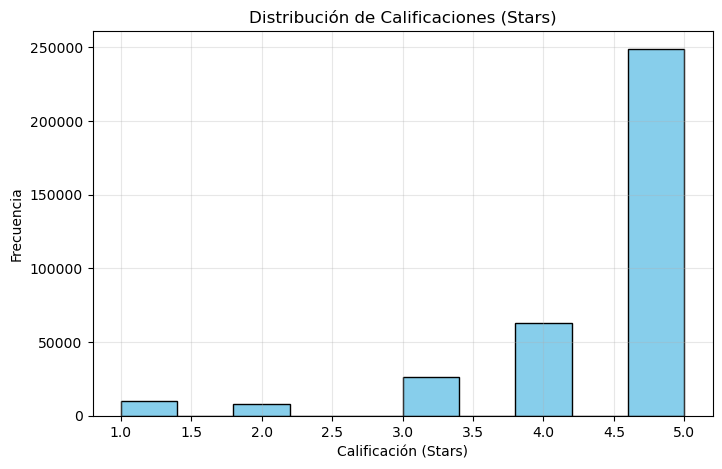

In [30]:
# Resumen de la variable 'stars'
print("\nResumen de calificaciones (stars):")
print(df_base['stars'].describe())

# Distribución de calificaciones
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_base['stars'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribución de Calificaciones (Stars)")
plt.xlabel("Calificación (Stars)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


`Total de calificaciones:` Hay 356,475 reviews en total en el dataset.

`Calificación promedio:` La calificación promedio es 4.49, lo que sugiere que la mayoría de las evaluaciones son positivas.

`Desviación estándar (std):` La desviación estándar es 0.92, lo que indica que la mayoría de las calificaciones están cercanas al promedio, aunque hay algo de variabilidad.

`Mediana:` La calificación mediana es 5.0, lo que significa que al menos el 50% de las reviews tienen la calificación máxima.

`Mínimo:` La calificación más baja es 1.0, lo que indica que también hay destinos con evaluaciones muy negativas.

`Máximo:` La calificación más alta es 5.0, lo cual es esperado ya que las calificaciones están en una escala de 1 a 5.

La barra más alta corresponde a la calificación de 5.0, que tiene una frecuencia superior a 250,000 reviews, es la calificación más común en el dataset. Las calificaciones de 1.0, 2.0 y 3.0 tienen frecuencias mucho más bajas, por lo que podemos deducir que las reseñas negativas son menos comunes.

Con respecto a las evaluaciones positivas, podemos creer que pudiera haber un sesgo en los datos, donde solo usuarios satisfechos evaluan los lugares. Y en este sentido, creemos importante analizar en detalle los lugares con evaluaciones bajas que pudieran estar enfrentando problemas con la experiencia de los usuarios.

Al tener un alto número de evaluaciones positivas, también consideramos importante considerar métricas adicionales como la frecuencia de visitas y el tipo de comentarios que realizanm para poder afrontar un correcto sistema de recomendación.

#### Frecuencia de visitas para identificar los destinos más visitados y los usuarios más activos.

In [33]:
# Top 10 destinos más visitados con porcentaje
top_destinos = df_base['place_name'].value_counts().head(10)
total_visitas = df_base['place_name'].value_counts().sum()

# Agregar porcentaje al Top 10
top_destinos_porcentaje = top_destinos.apply(lambda x: (x / total_visitas) * 100)

# Mostrar resultados
print("\nTop 10 destinos más visitados con porcentaje del total:")
top_destinos_con_porcentaje = pd.DataFrame({
    'Destino': top_destinos.index,
    'Visitas': top_destinos.values,
    'Porcentaje (%)': top_destinos_porcentaje.values
})
print(top_destinos_con_porcentaje)

# Top 10 usuarios con más reviews
top_usuarios = df_base['id_usuario'].value_counts().head(10)
total_reviews = df_base['id_usuario'].value_counts().sum()

# Agregar porcentaje al Top 10
top_usuarios_porcentaje = top_usuarios.apply(lambda x: (x / total_reviews) * 100)

# Mostrar resultados
print("\nTop 10 usuarios con más reviews con porcentaje del total:")
top_usuarios_con_porcentaje = pd.DataFrame({
    'Usuario': top_usuarios.index,
    'Reviews': top_usuarios.values,
    'Porcentaje (%)': top_usuarios_porcentaje.values
})
print(top_usuarios_con_porcentaje)





Top 10 destinos más visitados con porcentaje del total:
                                             Destino  Visitas  Porcentaje (%)
0                          "La Cervecería" Kunstmann    13253        3.717792
1  Encuentro Costumbrista en la Costa Playa Grand...    11630        3.262501
2                          Feria Fluvial de Valdivia    11103        3.114664
3                                  Plaza de Los Ríos     8311        2.331440
4                  Museo de Sitio Castillo de Niebla     7307        2.049793
5                                       Parque Saval     6433        1.804615
6                         Terminal de Buses Valdivia     5763        1.616663
7                           Portal Salto Huilo Huilo     5549        1.556631
8  Castillo San Sebastian de la Cruz, Corral. Sis...     5297        1.485939
9                            Chocolatería Entrelagos     4732        1.327442

Top 10 usuarios con más reviews con porcentaje del total:
                 Usuario  

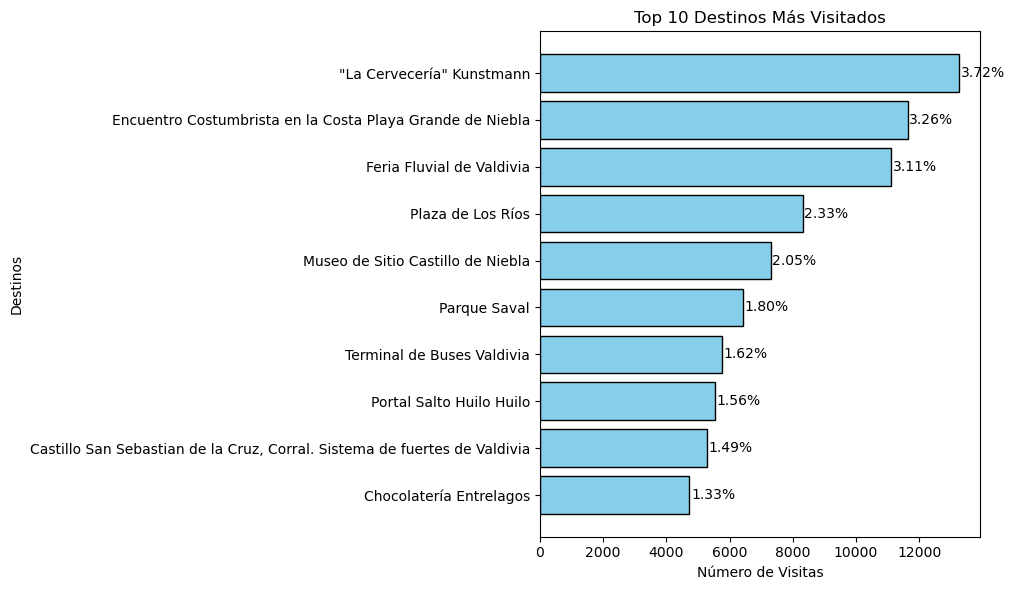

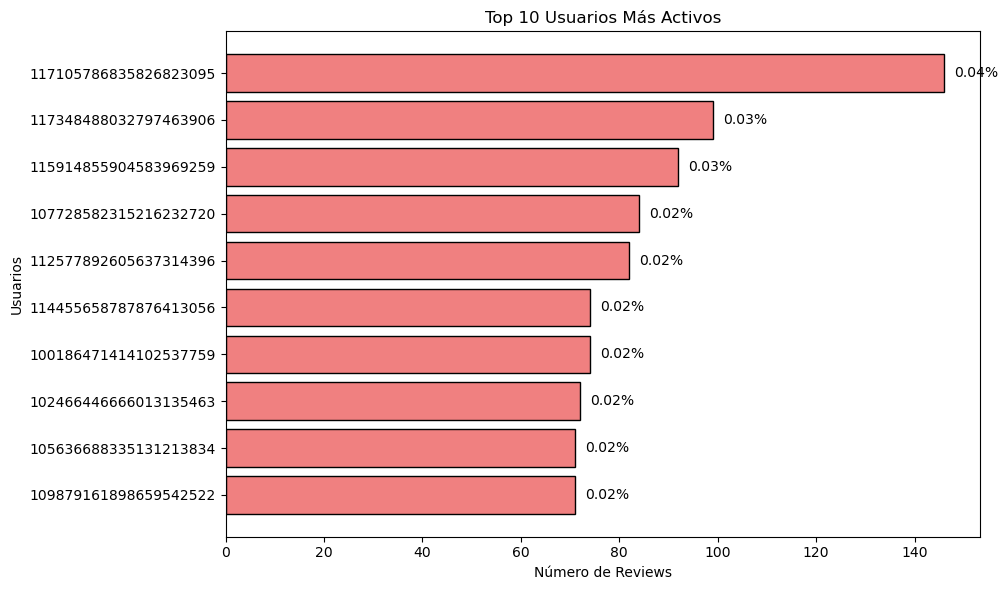

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_destinos_con_porcentaje['Destino'], top_destinos_con_porcentaje['Visitas'], color='skyblue', edgecolor='black')
plt.xlabel('Número de Visitas')
plt.ylabel('Destinos')
plt.title('Top 10 Destinos Más Visitados')
plt.gca().invert_yaxis()  # Colocar el destino más popular arriba
plt.tight_layout()

# Mostrar porcentajes en las barras
for i, (visitas, porcentaje) in enumerate(zip(top_destinos_con_porcentaje['Visitas'], top_destinos_con_porcentaje['Porcentaje (%)'])):
    plt.text(visitas + 50, i, f"{porcentaje:.2f}%", va='center')

plt.show()



# Gráfico de barras horizontales para usuarios con más reviews
plt.figure(figsize=(10, 6))
plt.barh(top_usuarios_con_porcentaje['Usuario'], top_usuarios_con_porcentaje['Reviews'], color='lightcoral', edgecolor='black')
plt.xlabel('Número de Reviews')
plt.ylabel('Usuarios')
plt.title('Top 10 Usuarios Más Activos')
plt.gca().invert_yaxis()  # Colocar el usuario más activo arriba
plt.tight_layout()

# Mostrar porcentajes en las barras
for i, (reviews, porcentaje) in enumerate(zip(top_usuarios_con_porcentaje['Reviews'], top_usuarios_con_porcentaje['Porcentaje (%)'])):
    plt.text(reviews + 2, i, f"{porcentaje:.2f}%", va='center')

plt.show()



#### ¿Qué lugar visitan los usuarios más activos?

Analizamos cuáles son los destinos más frecuentados por el top 10 de usuarios que tienen la mayor cantidad de interacciones (reviews).

In [37]:
# Top 10 usuarios más activos
top_usuarios = df_base['id_usuario'].value_counts().head(10).index

# Filtrar los destinos visitados por los usuarios más activos
destinos_usuarios_activos = df_base[df_base['id_usuario'].isin(top_usuarios)]

# Contar las visitas de cada usuario a los destinos
destinos_por_usuario = destinos_usuarios_activos.groupby(['id_usuario', 'place_name']).size().reset_index(name='visitas')

# Mostrar los destinos más visitados por los usuarios más activos
print("Destinos visitados por los usuarios más activos:")
print(destinos_por_usuario.sort_values(by=['id_usuario', 'visitas'], ascending=[True, False]))


Destinos visitados por los usuarios más activos:
                id_usuario                 place_name  visitas
0    100186471414102537759  "La Cervecería" Kunstmann        1
1    100186471414102537759           Aeródromo Pichoy        1
2    100186471414102537759             Arboretum UACh        1
3    100186471414102537759                 Bar Bundor        1
4    100186471414102537759      Bar Terraza Cervecera        1
..                     ...                        ...      ...
860  117348488032797463906                     Turbus        1
861  117348488032797463906     Vituperio Coffee & Bar        1
862  117348488032797463906              cafe del lago        1
863  117348488032797463906             casas amunantu        1
864  117348488032797463906          comidas Santa Ana        1

[865 rows x 3 columns]


In [38]:
# Obtener destinos únicos visitados por los usuarios más activos
destinos_unicos = destinos_usuarios_activos['place_name'].unique()

# Mostrar los destinos únicos
print(f"Cantidad de destinos únicos visitados por los usuarios más activos: {len(destinos_unicos)}")
print("\nDestinos únicos visitados por los usuarios más activos:")
print(destinos_unicos)


Cantidad de destinos únicos visitados por los usuarios más activos: 419

Destinos únicos visitados por los usuarios más activos:
['Gohan Sushi & Shrimps' 'Cafe El Molino' 'Parque Urbano El Bosque'
 'Hotel Melillanca' 'Fuente Valdiviana' 'Restaurant Don Floro'
 'Ranco Lake' 'Puente Caucau' 'Termas de Chihuío'
 'Terminal De Buses Paillaco'
 'Acotur Patagonia Chile - Agencia de Turismo & Viajes'
 'Hotel Spa Termas Llifen' 'Laguna de Lotos' 'Torreón del Barro'
 'Clover Irish Pub' 'Mirador Toledo'
 'Museo de Sitio Castillo San Pedro de Alcántara'
 'Panaderia Puritan Fundadores' 'Parrilla de Thor' 'Las Vigas Restaurante'
 'Torreón de los Canelos' 'Piscina Aqua Valdivia'
 'Terminal de Buses Valdivia'
 'Castillo San Sebastian de la Cruz, Corral. Sistema de fuertes de Valdivia'
 'Chocolatería Entrelagos' 'Costanera Arturo Prat' 'Playa Los Molinos'
 'Plaza de la República' 'La Última Frontera' 'El Growler' 'Bar Bundor'
 'Botellas Licorería' 'Mirador Rucatrehua' 'Parque Santa Inés'
 'Saltos Mirad

In [39]:
# Contar cuántos destinos de cada categoría han visitado los usuarios más activos
categorias_por_usuario = destinos_usuarios_activos.groupby(['id_usuario', 'category']).size().reset_index(name='conteo')
print("Categorías más visitadas por los usuarios más activos:")
print(categorias_por_usuario.sort_values(by=['id_usuario', 'conteo'], ascending=[True, False]))


Categorías más visitadas por los usuarios más activos:
                id_usuario                category  conteo
12   100186471414102537759              restaurant      28
2    100186471414102537759                     bar      10
10   100186471414102537759                    park       8
15   100186471414102537759      tourist_attraction       6
3    100186471414102537759                    cafe       4
..                     ...                     ...     ...
178  117348488032797463906                   store       2
167  117348488032797463906              campground       1
168  117348488032797463906                  casino       1
169  117348488032797463906                    food       1
170  117348488032797463906  grocery_or_supermarket       1

[181 rows x 3 columns]


La categoria `Restaurant` domina como categoría más visitada. 

- El usuario más activo visitó 28 destinos en la categoría "restaurant", seguido por "bar" (10 destinos) y "park" (8 destinos).

- También hay visitas a categorías menos comunes como "cafe", "store" y "casino".

**Las categorías populares están relacionadas con actividades recreativas y gastronómicas, lo que sugiere que los usuarios más activos buscan experiencias sociales y culturales.**

### TOP 3 DE CATEGORIAS.

#### Analizamos la categoria RESTAURANT:

Top 10 destinos con las evaluaciones más altas en la categoría 'restaurant':
                            place_name  calificacion_promedio
47          Coco pizza colombian coffe                    5.0
256           Restaurante donde marlen                    5.0
134                   La Taza Turquesa                    5.0
13   Burger King ® Mall Plaza Los Ríos                    5.0
86                         FAKTORSABOR                    5.0
102           Gustitos Pizza, Valdivia                    5.0
78                            El ovejo                    5.0
77                             El Yugo                    5.0
99    Gastronomia Mapuche Fresia Caman                    5.0
274                         SushiAkila                    5.0

Top 10 destinos con las evaluaciones más bajas en la categoría 'restaurant':
                                            place_name  calificacion_promedio
44                             Comidas caseras AL PASO                    1.0
205    

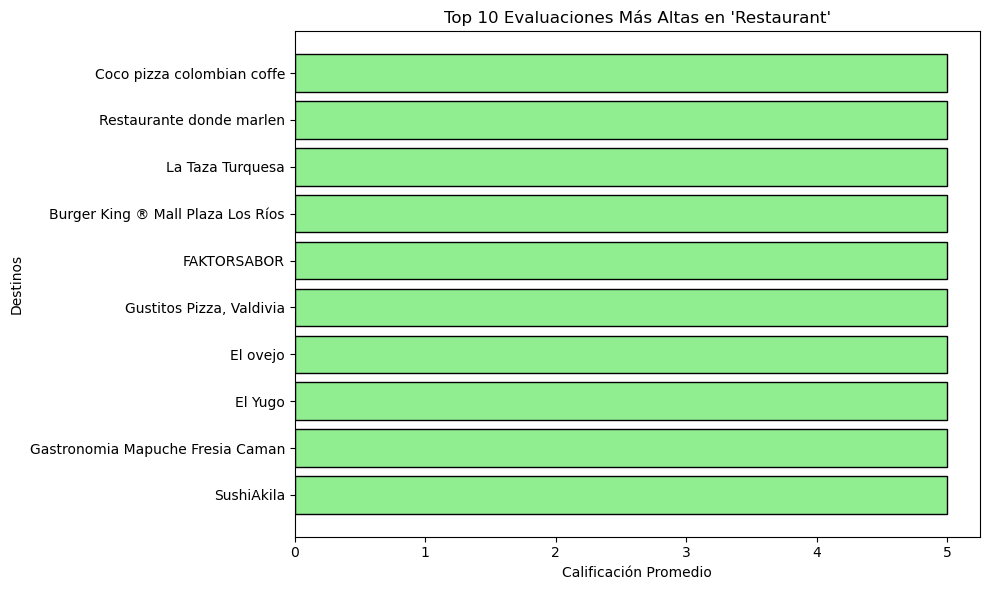

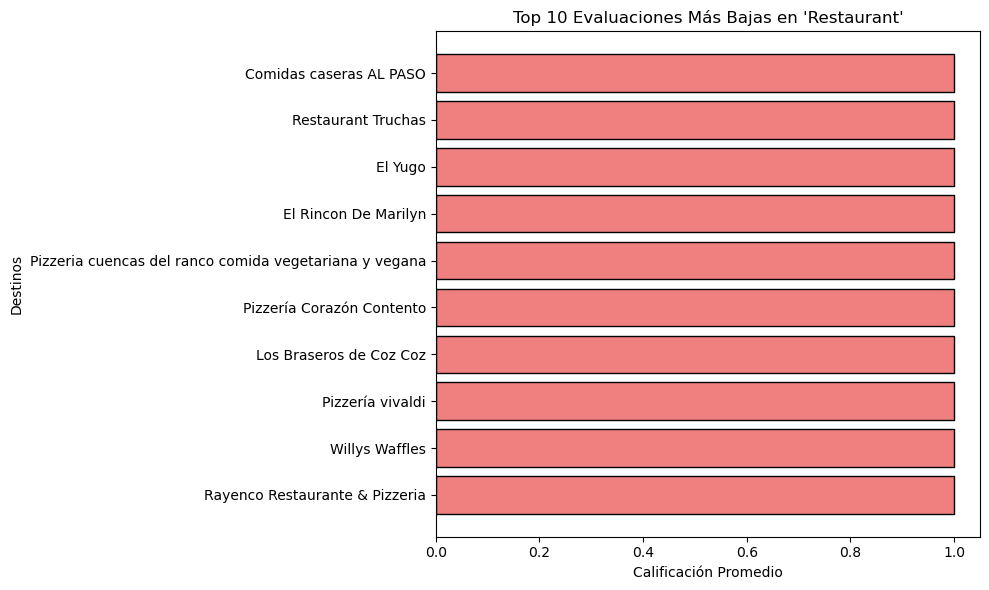

In [43]:
# Filtrar datos para la categoría "restaurant"
calificaciones_restaurant = df_base[df_base['category'] == 'restaurant']

# Top 10 destinos con las evaluaciones más altas (≥4)
top_10_altas = calificaciones_restaurant[calificaciones_restaurant['stars'] >= 4] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=False) \
    .head(10)

# Top 10 destinos con las evaluaciones más bajas (≤2)
top_10_bajas = calificaciones_restaurant[calificaciones_restaurant['stars'] <= 2] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=True) \
    .head(10)

# Mostrar los resultados
print("Top 10 destinos con las evaluaciones más altas en la categoría 'restaurant':")
print(top_10_altas)

print("\nTop 10 destinos con las evaluaciones más bajas en la categoría 'restaurant':")
print(top_10_bajas)


# Gráfico de barras para las evaluaciones más altas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_altas['place_name'], top_10_altas['calificacion_promedio'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Altas en 'Restaurant'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de barras para las evaluaciones más bajas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bajas['place_name'], top_10_bajas['calificacion_promedio'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Bajas en 'Restaurant'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Analizamos la categoria BAR:

Top 10 destinos con las evaluaciones más altas en la categoría 'bar':
                       place_name  calificacion_promedio
0                      11Restobar               5.000000
34                  Nina Café Bar               5.000000
31  MYSTIKA CERVECERIA & PIZZERIA               5.000000
28                Klandstinov Bar               5.000000
16         Cervecería Monte Viejo               4.916667
9                 Bodega Chumpeco               4.909091
37           Restaurant Pap Schop               4.900000
15     Cervecería Elfo Del Bosque               4.878205
6                 Barbudo Growler               4.872340
25        Fehlandt Cerveza Granel               4.869565

Top 10 destinos con las evaluaciones más bajas en la categoría 'bar':
                     place_name  calificacion_promedio
24      Fehlandt Cerveza Granel               1.000000
15       Cervecería Monte Viejo               1.000000
8               Bodega Chumpeco               1.000000
29          

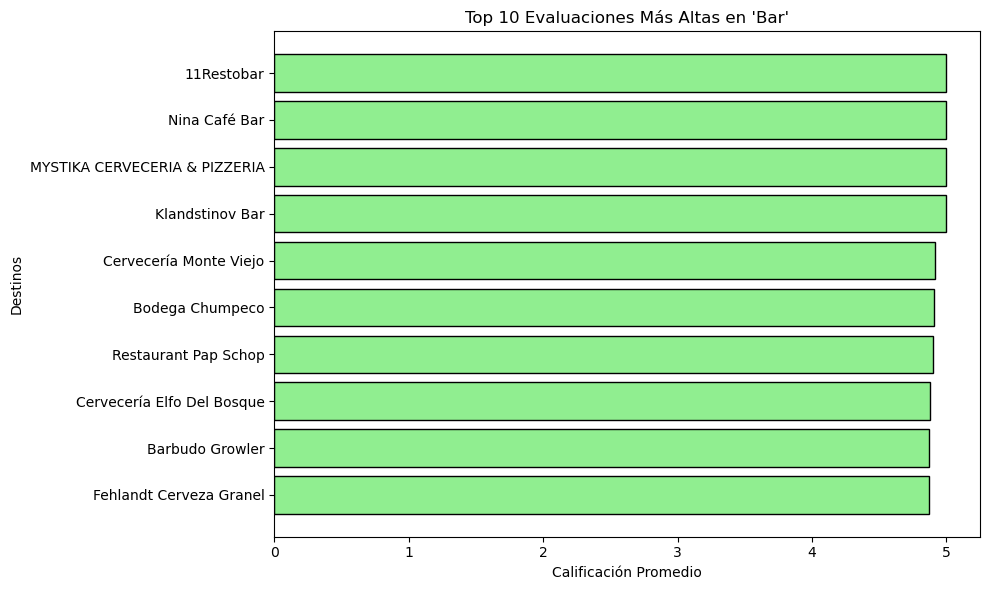

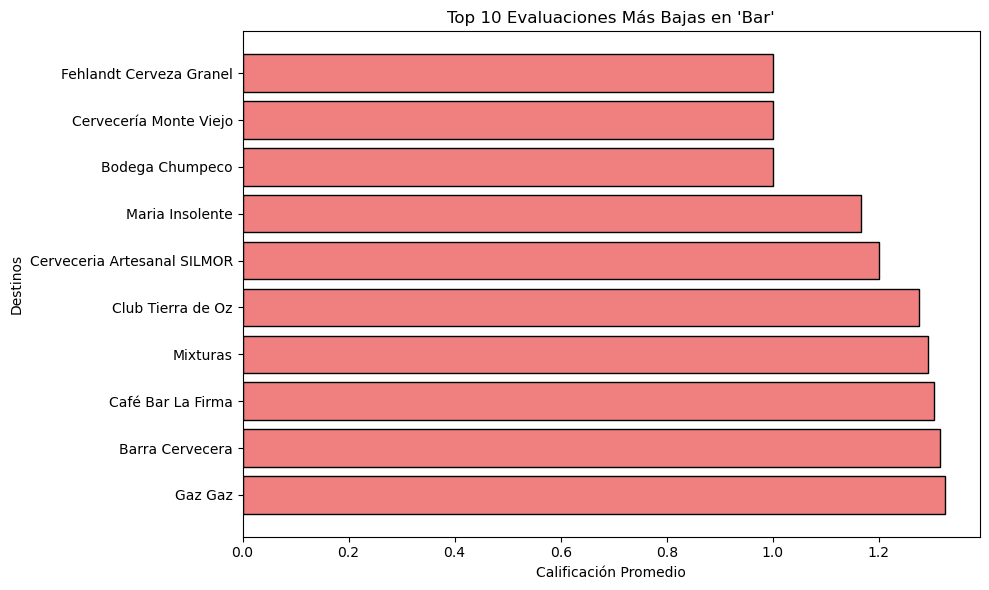

In [45]:
# Filtrar datos para la categoría "bar"
calificaciones_bar = df_base[df_base['category'] == 'bar']

# Top 10 destinos con las evaluaciones más altas (≥4)
top_10_altas = calificaciones_bar[calificaciones_bar['stars'] >= 4] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=False) \
    .head(10)

# Top 10 destinos con las evaluaciones más bajas (≤2)
top_10_bajas = calificaciones_bar[calificaciones_bar['stars'] <= 2] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=True) \
    .head(10)

# Mostrar los resultados
print("Top 10 destinos con las evaluaciones más altas en la categoría 'bar':")
print(top_10_altas)

print("\nTop 10 destinos con las evaluaciones más bajas en la categoría 'bar':")
print(top_10_bajas)


# Gráfico de barras para las evaluaciones más altas

plt.figure(figsize=(10, 6))
plt.barh(top_10_altas['place_name'], top_10_altas['calificacion_promedio'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Altas en 'Bar'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de barras para las evaluaciones más bajas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bajas['place_name'], top_10_bajas['calificacion_promedio'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Bajas en 'Bar'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 destinos con las evaluaciones más altas en la categoría 'park':
                                  place_name  calificacion_promedio
2                  Bosque humedal Angachilla               5.000000
3                           Bosques de Relin               5.000000
45                           Plaza Los Pinos               5.000000
5                 Centro Ecoturismo Mallacan               5.000000
57                 Reserva Natural Pilunkura               5.000000
7   Escuela y Parque Agroecológico De Lumaco               5.000000
27                 Parque Saltos del Nilahue               4.969697
8                                Huilo Huilo               4.947867
25                           Parque Peumayen               4.941176
35            Parque de Insectos Ishiku Lemu               4.941176

Top 10 destinos con las evaluaciones más bajas en la categoría 'park':
                     place_name  calificacion_promedio
24      Fehlandt Cerveza Granel               1.000000

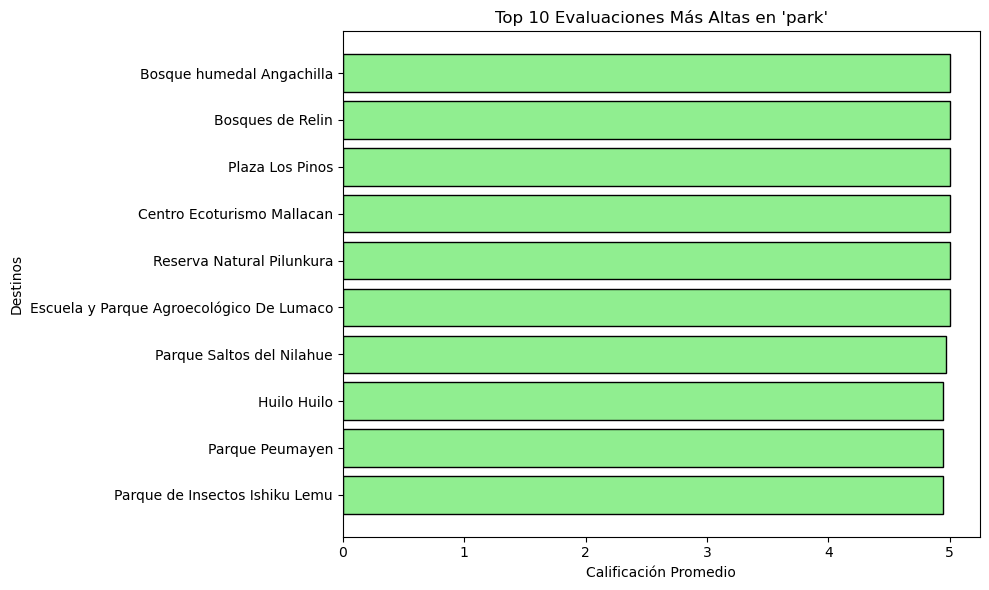

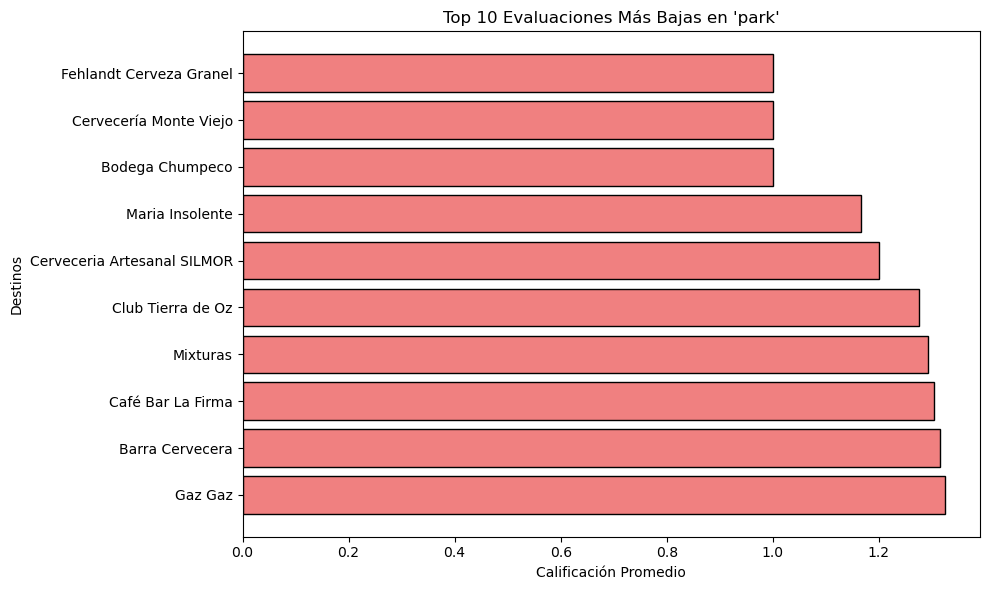

In [46]:
# Filtrar datos para la categoría "park"
calificaciones_park = df_base[df_base['category'] == 'park']

# Top 10 destinos con las evaluaciones más altas (≥4)
top_10_altas = calificaciones_park[calificaciones_park['stars'] >= 4] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=False) \
    .head(10)

# Top 10 destinos con las evaluaciones más bajas (≤2)
top_10_bajas = calificaciones_bar[calificaciones_bar['stars'] <= 2] \
    .groupby('place_name')['stars'].mean() \
    .reset_index(name='calificacion_promedio') \
    .sort_values(by='calificacion_promedio', ascending=True) \
    .head(10)

# Mostrar los resultados
print("Top 10 destinos con las evaluaciones más altas en la categoría 'park':")
print(top_10_altas)

print("\nTop 10 destinos con las evaluaciones más bajas en la categoría 'park':")
print(top_10_bajas)


# Gráfico de barras para las evaluaciones más altas

plt.figure(figsize=(10, 6))
plt.barh(top_10_altas['place_name'], top_10_altas['calificacion_promedio'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Altas en 'park'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Gráfico de barras para las evaluaciones más bajas
plt.figure(figsize=(10, 6))
plt.barh(top_10_bajas['place_name'], top_10_bajas['calificacion_promedio'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Evaluaciones Más Bajas en 'park'")
plt.xlabel("Calificación Promedio")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### ¿Qué ciudad visitan los usuarios más activos?

In [48]:
ciudades_por_usuario = destinos_usuarios_activos.groupby(['id_usuario', 'city']).size().reset_index(name='conteo')
print("Ciudades más visitadas por los usuarios más activos:")
print(ciudades_por_usuario.sort_values(by=['id_usuario', 'conteo'], ascending=[True, False]))


Ciudades más visitadas por los usuarios más activos:
               id_usuario                   city  conteo
10  100186471414102537759               Valdivia      61
9   100186471414102537759  San José de Mariquina       2
0   100186471414102537759              Curiñanco       1
1   100186471414102537759                Futrono       1
2   100186471414102537759                Liquine       1
..                    ...                    ...     ...
89  117348488032797463906            Panguipulli       2
81  117348488032797463906                 Corral       1
90  117348488032797463906           Puerto Nuevo       1
91  117348488032797463906         Puerto Squella       1
94  117348488032797463906  San José de Mariquina       1

[96 rows x 3 columns]


La ciudad `Valdivia` es la ciudad más visitada.

- El usuario más activo realizó 61 visitas a destinos en Valdivia, lo que la convierte en un punto de interés clave.

- Otras ciudades visitadas por los usuarios más activos incluyen "San José de Mariquina", "Corral" y "Panguipulli", pero con un número significativamente menor de visitas (1-2 destinos).

**Es probable que la categoría más visitada, "restaurant", esté asociada principalmente con destinos en ciudades como Valdivia, que concentra una gran cantidad de actividades turísticas y gastronómicas.**

#### ¿Tienen un patrón de calificación específico los usuarios más activos?

Vemos una comparación entre las calificaciones promedio de los usuarios más activos y el promedio general.

Calificación promedio general: 4.50

Calificaciones promedio de los usuarios más activos:
              id_usuario  calificacion_promedio
0  100186471414102537759               4.378378
1  102466446666013135463               4.541667
2  105636688335131213834               4.647887
3  107728582315216232720               4.214286
4  109879161898659542522               4.901408
5  112577892605637314396               4.841463
6  114455658787876413056               4.054054
7  115914855904583969259               4.739130
8  117105786835826823095               4.630137
9  117348488032797463906               4.868687


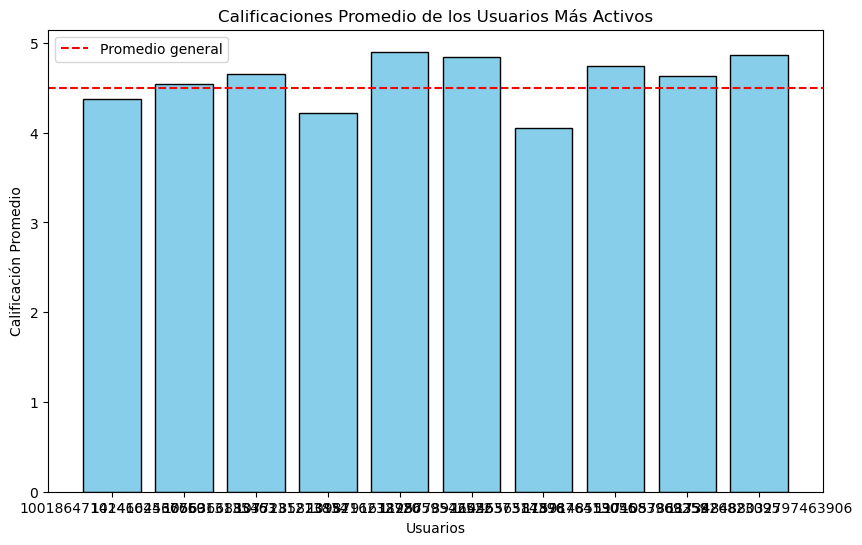

In [53]:
# Calcular el promedio de calificaciones (stars) de los usuarios más activos
calificaciones_por_usuario = destinos_usuarios_activos.groupby('id_usuario')['stars'].mean().reset_index(name='calificacion_promedio')

# Comparar con la calificación promedio general
calificacion_promedio_general = df_base['stars'].mean()

print(f"Calificación promedio general: {calificacion_promedio_general:.2f}")
print("\nCalificaciones promedio de los usuarios más activos:")
print(calificaciones_por_usuario)

# Visualización: comparar calificaciones promedio
plt.figure(figsize=(10, 6))
plt.bar(calificaciones_por_usuario['id_usuario'].astype(str), calificaciones_por_usuario['calificacion_promedio'], color='skyblue', edgecolor='black')
plt.axhline(calificacion_promedio_general, color='red', linestyle='--', label='Promedio general')
plt.xlabel("Usuarios")
plt.ylabel("Calificación Promedio")
plt.title("Calificaciones Promedio de los Usuarios Más Activos")
plt.legend()
plt.show()

Podemos ver que las calificaciones promedio de los usuarios más activos varían entre 4.378 y 4.869, lo que indica diferencias leves. La mayoría de las calificaciones promedio están por encima del promedio general (representado por la línea roja en el gráfico), lo que sugiere que los usuarios más activos tienden a dar calificaciones más altas.

Podemos ver que posiblemente hay un sesgo positivo entre los usuarios más frecuentes o también puede ser que los destinos frecuentados por estos usuarios son generalmente bien calificados.

Existe un usuario que su clasificación promedio (4.378) está ligeramente por debajo de los demás, pero aún evalúa positivamente. **Este usuario podría ser considerado más crítico en comparación con los otros usuarios más activos y pudiera ser de ayuda para futuros análisis.** `Usuario 17105786385826823095` y `Usuario 107285632152162720`.

Analizamos las calificaciones bajas (≤2) y altas (≥4) realizadas por los usuarios más activos, podemos identificar las siguientes observaciones clave:

Calificaciones bajas y altas por usuario:
               id_usuario               level_1  stars
0   100186471414102537759  calificaciones_bajas      4
1   100186471414102537759  calificaciones_altas     61
2   102466446666013135463  calificaciones_bajas      0
3   102466446666013135463  calificaciones_altas     70
4   105636688335131213834  calificaciones_bajas      1
5   105636688335131213834  calificaciones_altas     60
6   107728582315216232720  calificaciones_bajas      1
7   107728582315216232720  calificaciones_altas     74
8   109879161898659542522  calificaciones_bajas      0
9   109879161898659542522  calificaciones_altas     71
10  112577892605637314396  calificaciones_bajas      1
11  112577892605637314396  calificaciones_altas     78
12  114455658787876413056  calificaciones_bajas      4
13  114455658787876413056  calificaciones_altas     54
14  115914855904583969259  calificaciones_bajas      2
15  115914855904583969259  calificaciones_altas     89
16  1171057868358268230

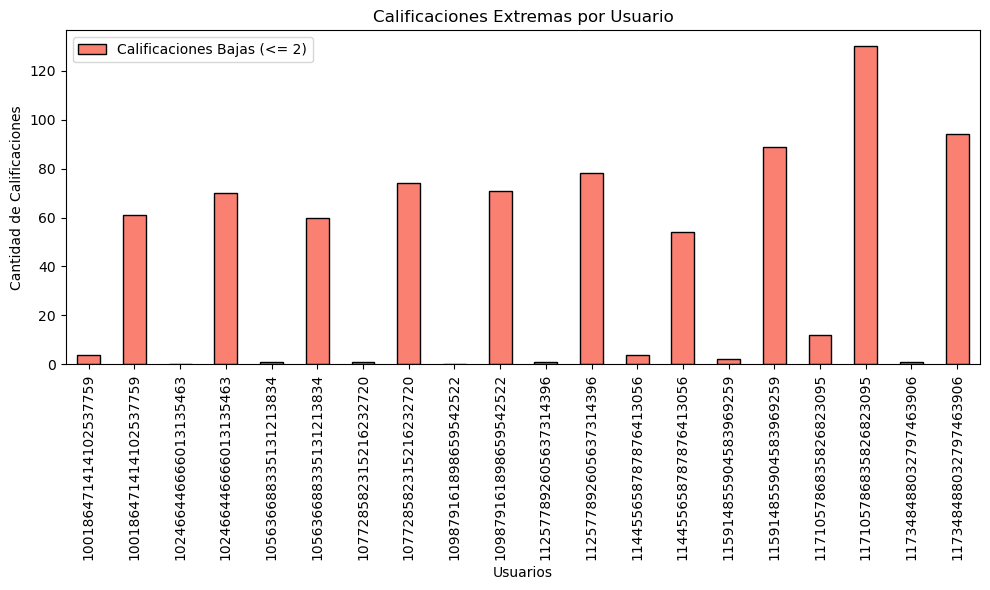

In [56]:
# Contar calificaciones bajas (1-2 estrellas) y altas (4-5 estrellas) por usuario
calificaciones_extremas = destinos_usuarios_activos.groupby('id_usuario')['stars'].apply(
    lambda x: pd.Series({
        'calificaciones_bajas': sum(x <= 2),
        'calificaciones_altas': sum(x >= 4)
    })
).reset_index()

print("Calificaciones bajas y altas por usuario:")
print(calificaciones_extremas)

# Visualizar proporción de calificaciones extremas
calificaciones_extremas.plot(
    x='id_usuario',
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['salmon', 'skyblue'],
    edgecolor='black'
)
plt.title("Calificaciones Extremas por Usuario")
plt.ylabel("Cantidad de Calificaciones")
plt.xlabel("Usuarios")
plt.legend(["Calificaciones Bajas (<= 2)", "Calificaciones Altas (>= 4)"])
plt.tight_layout()
plt.show()


`Usuarios con calificaciones bajas (≤2):`
La mayoría de los usuarios tienen muy pocas calificaciones bajas (entre 0 y 4). Esto indica que estos usuarios suelen otorgar calificaciones positivas o moderadas en lugar de críticas negativas.
Por ejemplo, algunos usuarios como 1024646466013135463 y 107285632152162720 no dieron ninguna calificación baja, mientras que otros, como 117105786385826823095, dieron hasta 12 calificaciones bajas.

`Usuarios con calificaciones altas (≥4):`Todos los usuarios tienen un número considerablemente mayor de calificaciones altas en comparación con calificaciones bajas. Algunos usuarios, como 117105786385826823095, destacan por haber otorgado hasta 130 calificaciones altas, lo que refleja un comportamiento altamente positivo.

#### Relación entre calificaciones bajas y categorías. Aca se consideran todos los usuarios, no solo el top 10 que mas calificaciones ha realizado.

Calificaciones bajas por categoría:
                  category  conteo
30              restaurant    5451
39      tourist_attraction    2020
28       point_of_interest    1906
20                 lodging    1838
26                    park    1060
3                      bar     866
34           shopping_mall     815
24                  museum     522
5                     cafe     521
25         natural_feature     357
14                    food     353
36                   store     286
9                   casino     259
16  grocery_or_supermarket     252
2                   bakery     235
6               campground     183
0                  airport     142
41           travel_agency     126
35                     spa     111
19            liquor_store      81
8               car_rental      76
11                  church      51
1           amusement_park      43
15             gas_station      39
42              university      26
22           meal_takeaway      10
4               boo

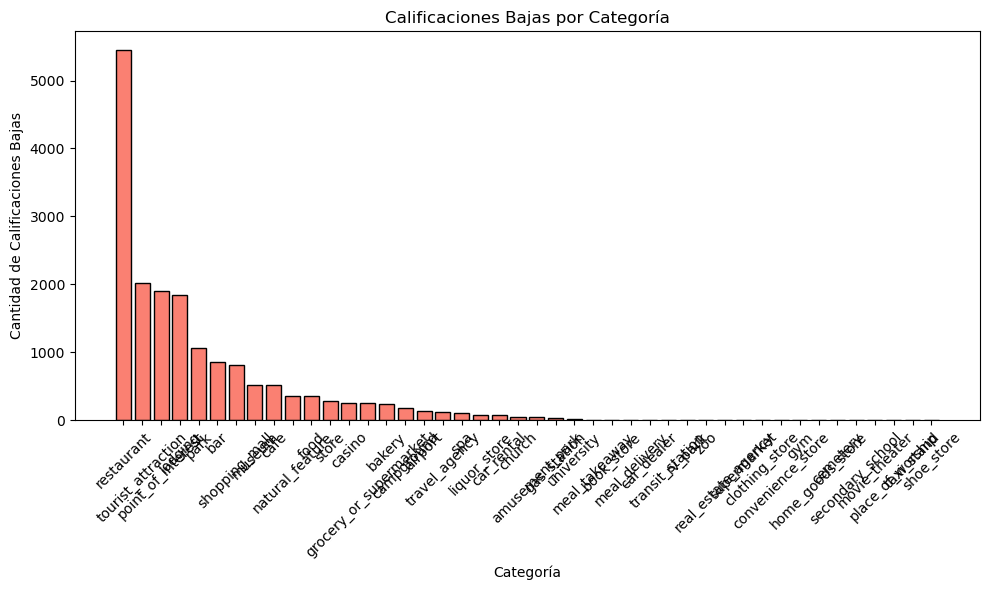

In [60]:
# Filtrar las calificaciones bajas (≤2)
calificaciones_bajas = df_base[df_base['stars'] <= 2]

# Contar cuántas calificaciones bajas tiene cada categoría
calificaciones_bajas_por_categoria = calificaciones_bajas.groupby('category').size().reset_index(name='conteo')

# Ordenar por el número de calificaciones bajas
calificaciones_bajas_por_categoria = calificaciones_bajas_por_categoria.sort_values(by='conteo', ascending=False)

# Mostrar los resultados
print("Calificaciones bajas por categoría:")
print(calificaciones_bajas_por_categoria)

# Visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(calificaciones_bajas_por_categoria['category'], calificaciones_bajas_por_categoria['conteo'], color='salmon', edgecolor='black')
plt.title("Calificaciones Bajas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Calificaciones Bajas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Destinos con más calificaciones bajas:
                                            place_name  conteo
769                                  Plaza de Los Ríos     652
0                            "La Cervecería" Kunstmann     644
342  Encuentro Costumbrista en la Costa Playa Grand...     384
371                          Feria Fluvial de Valdivia     350
219                     Casino De Juegos Valdivia S.A.     259
771                              Plaza de la República     250
619                  Museo de Sitio Castillo de Niebla     219
3                                    AL YUGO RESTORANT     202
982                         Terminal de Buses Valdivia     194
253                            Chocolatería Entrelagos     192


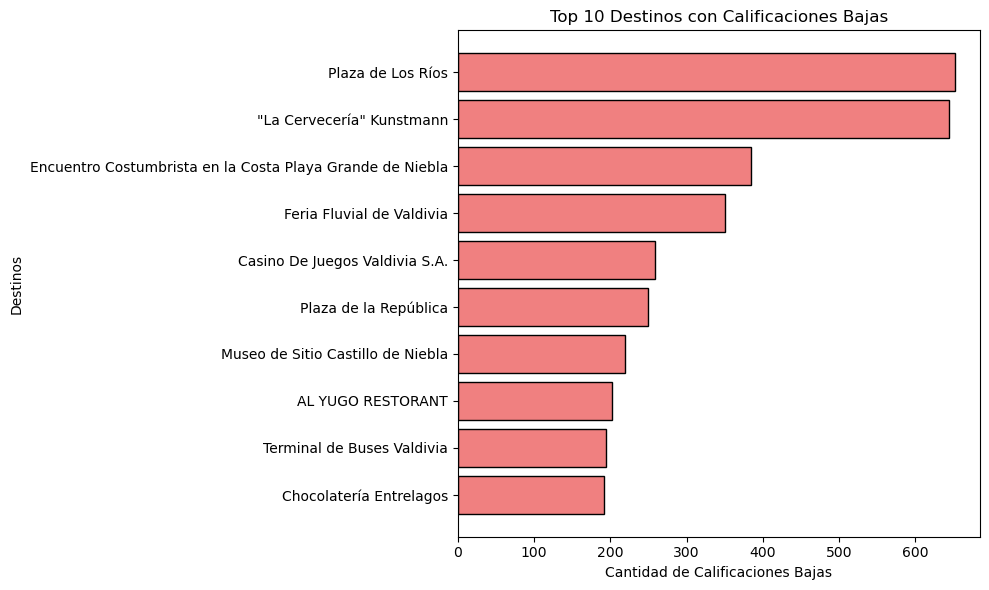

Destinos con más calificaciones bajas:
                                            place_name  conteo
769                                  Plaza de Los Ríos     652
0                            "La Cervecería" Kunstmann     644
342  Encuentro Costumbrista en la Costa Playa Grand...     384
371                          Feria Fluvial de Valdivia     350
219                     Casino De Juegos Valdivia S.A.     259
771                              Plaza de la República     250
619                  Museo de Sitio Castillo de Niebla     219
3                                    AL YUGO RESTORANT     202
982                         Terminal de Buses Valdivia     194
253                            Chocolatería Entrelagos     192


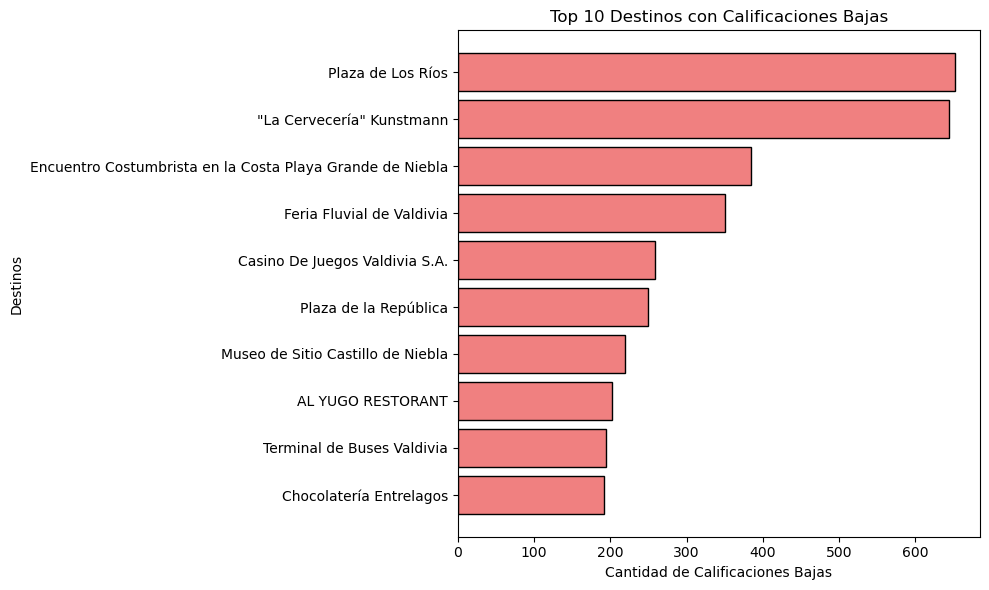

In [61]:
# Contar calificaciones bajas por destino
calificaciones_bajas_por_destino = calificaciones_bajas.groupby('place_name').size().reset_index(name='conteo')

# Ordenar por número de calificaciones bajas
calificaciones_bajas_por_destino = calificaciones_bajas_por_destino.sort_values(by='conteo', ascending=False).head(10)

# Mostrar los resultados
print("Destinos con más calificaciones bajas:")
print(calificaciones_bajas_por_destino)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(calificaciones_bajas_por_destino['place_name'], calificaciones_bajas_por_destino['conteo'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Destinos con Calificaciones Bajas")
plt.xlabel("Cantidad de Calificaciones Bajas")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Contar calificaciones altas por destino
calificaciones_bajas_por_destino = calificaciones_bajas.groupby('place_name').size().reset_index(name='conteo')

# Ordenar por número de calificaciones bajas
calificaciones_bajas_por_destino = calificaciones_bajas_por_destino.sort_values(by='conteo', ascending=False).head(10)

# Mostrar los resultados
print("Destinos con más calificaciones bajas:")
print(calificaciones_bajas_por_destino)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(calificaciones_bajas_por_destino['place_name'], calificaciones_bajas_por_destino['conteo'], color='lightcoral', edgecolor='black')
plt.title("Top 10 Destinos con Calificaciones Bajas")
plt.xlabel("Cantidad de Calificaciones Bajas")
plt.ylabel("Destinos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### ¿Los destinos más visitados tienen mejores calificaciones promedio?

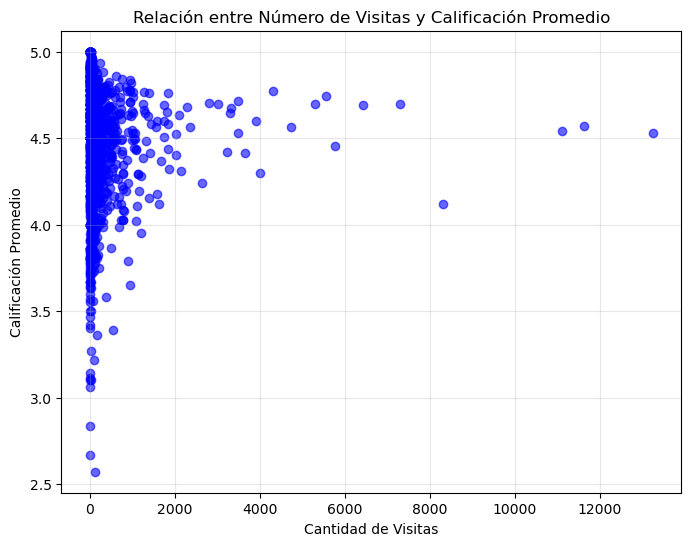

In [63]:
# Relación entre calificaciones promedio y visitas por destino
df_calif_visitas = df_base.groupby('place_name').agg(
    calificacion_promedio=('stars', 'mean'),
    cantidad_visitas=('stars', 'count')
).reset_index()

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_calif_visitas['cantidad_visitas'], df_calif_visitas['calificacion_promedio'], alpha=0.6, color='blue')
plt.title("Relación entre Número de Visitas y Calificación Promedio")
plt.xlabel("Cantidad de Visitas")
plt.ylabel("Calificación Promedio")
plt.grid(alpha=0.3)
plt.show()


La mayoría de los destinos tienen un número bajo de visitas grupados en el rango de 0 a 1000. Estos destinos suelen tener calificaciones promedio distribuidas entre 3.0 y 5.0, con una tendencia más concentrada hacia calificaciones altas (≥4.5).

Algunos destinos con más de 5000 visitas también tienen calificaciones altas (≥4.5). Sin embargo, a medida que aumenta el número de visitas, parece haber una mayor dispersión en las calificaciones promedio y consideramos que podria ser por mayor diversidad de opiniones en destinos muy visitados o por experiencias más variadas en estos destinos.

Es importante recalcar que  los destinos con calificaciones promedio bajas (<3.5) tienden a tener un número relativamente bajo de visitas, lo que podría indicar que los destinos menos populares son también aquellos con experiencias menos satisfactorias.

#### ¿Algunas categorías tienen consistentemente mejores calificaciones que otras?

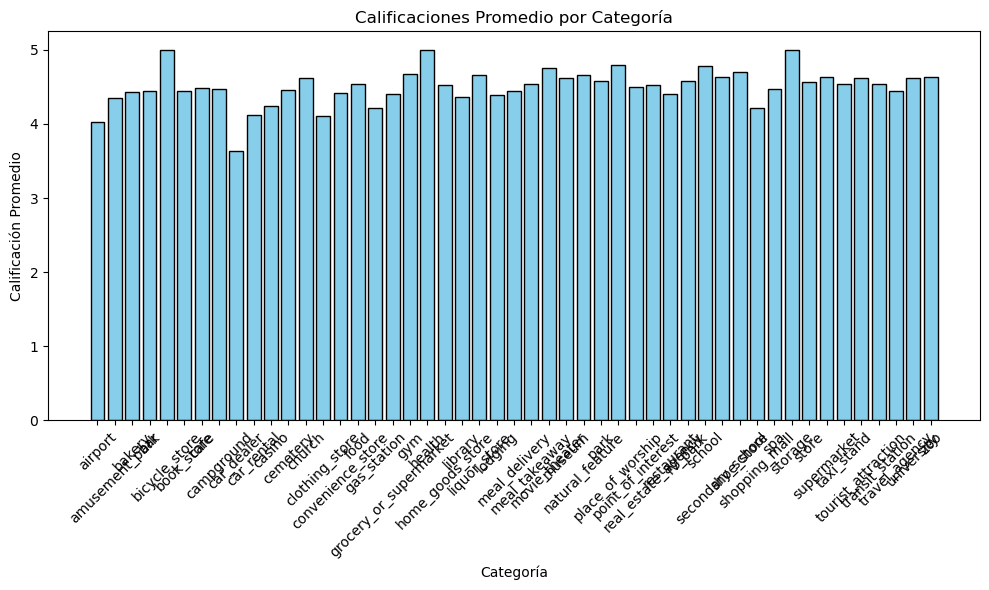

In [66]:
# Calificaciones promedio por categoría
calificaciones_por_categoria = df_base.groupby('category')['stars'].mean().reset_index()

# Visualización
plt.figure(figsize=(10, 6))
plt.bar(calificaciones_por_categoria['category'], calificaciones_por_categoria['stars'], color='skyblue', edgecolor='black')
plt.title("Calificaciones Promedio por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`Natural_feature"` y `"Tourist_attraction"` tienen calificaciones promedio cercanas a 5.0, por lo que vemos que  los destinos relacionados con naturaleza y turismo son muy valorados. **Podría estar relacionado con experiencias únicas que generan satisfacción.**

`"Store"`, `"Grocery_or_supermarket"`, y `"School"` tienen calificaciones promedio más bajas, lo que **podría deberse a que estas categorías no generan experiencias emocionales significativas**, ya que están más relacionadas con actividades cotidianas.

Las categorías relacionadas con ocio, naturaleza y turismo tienden a ser más valoradas que aquellas relacionadas con actividades funcionales o comerciales.

#### ¿Ciertas ciudades tienen calificaciones consistentemente más altas o bajas?

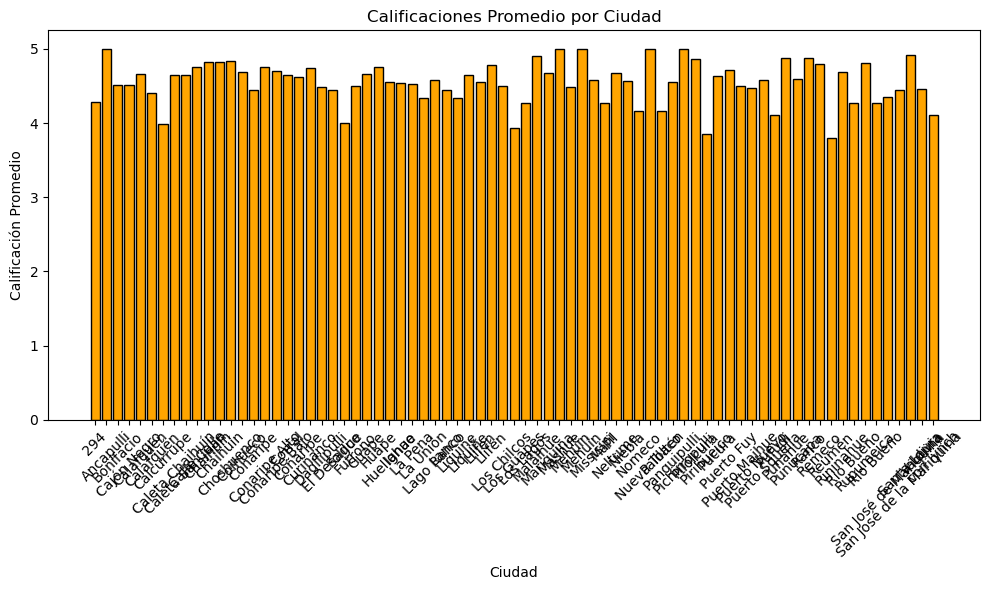

In [69]:
# Calificaciones promedio por ciudad
calificaciones_por_ciudad = df_base.groupby('city')['stars'].mean().reset_index()

# Visualización
plt.figure(figsize=(10, 6))
plt.bar(calificaciones_por_ciudad['city'], calificaciones_por_ciudad['stars'], color='orange', edgecolor='black')
plt.title("Calificaciones Promedio por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Correlación entre variables numéricas:

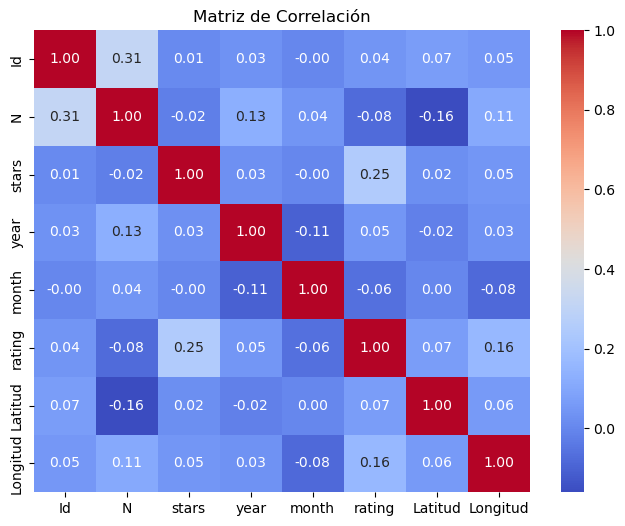

In [71]:
# Seleccionar columnas numéricas
df_numeric = df_base.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
corr_matrix = df_numeric.corr()

# Visualización de correlación con un mapa de calor
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()


No aporta al analisis debido a que se comparan variables numericas que no son comparables.

#### Tendencia en el tiempo.

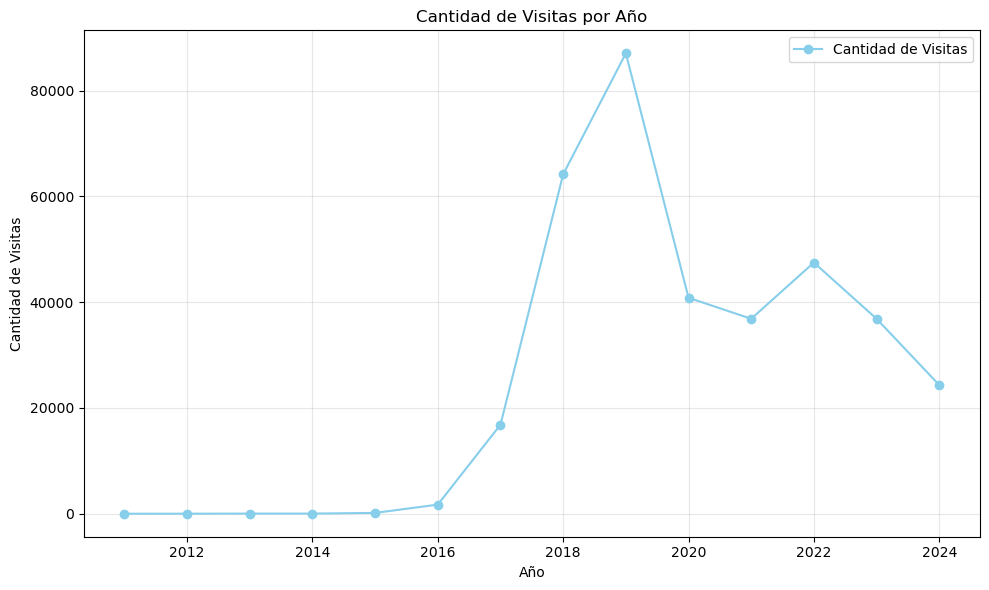

In [74]:
# Cantidad de visitas por año
visitas_por_anio = df_base.groupby('year')['place_name'].count().reset_index(name='cantidad_visitas')

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(visitas_por_anio['year'], visitas_por_anio['cantidad_visitas'], marker='o', linestyle='-', color='skyblue', label='Cantidad de Visitas')
plt.title("Cantidad de Visitas por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Visitas")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


- Antes de 2016, la cantidad de visitas era muy baja, casi insignificante.

- A partir de 2016, se observa un crecimiento exponencial en la cantidad de visitas, alcanzando un máximo en 2019.

- En 2019, se registra el mayor número de visitas en todo el periodo analizado, con más de 80,000 visitas.

- En 2020, la cantidad de visitas cae significativamente. Este descenso se intuye qu eesta relacionado con la pandemia COVID-19.

- En 2021 y 2022, se observa una recuperación progresiva, aunque no alcanza los niveles de 2019. Esto podría deberse a una lenta reactivación del turismo tras la pandemia.

- En los años más recientes (2023 y 2024), parece haber una tendencia descendente nuevamente. Esto podría indicar que factores por ejemplos economicos a nivel pais pudieran estar influyendo en el turismo.


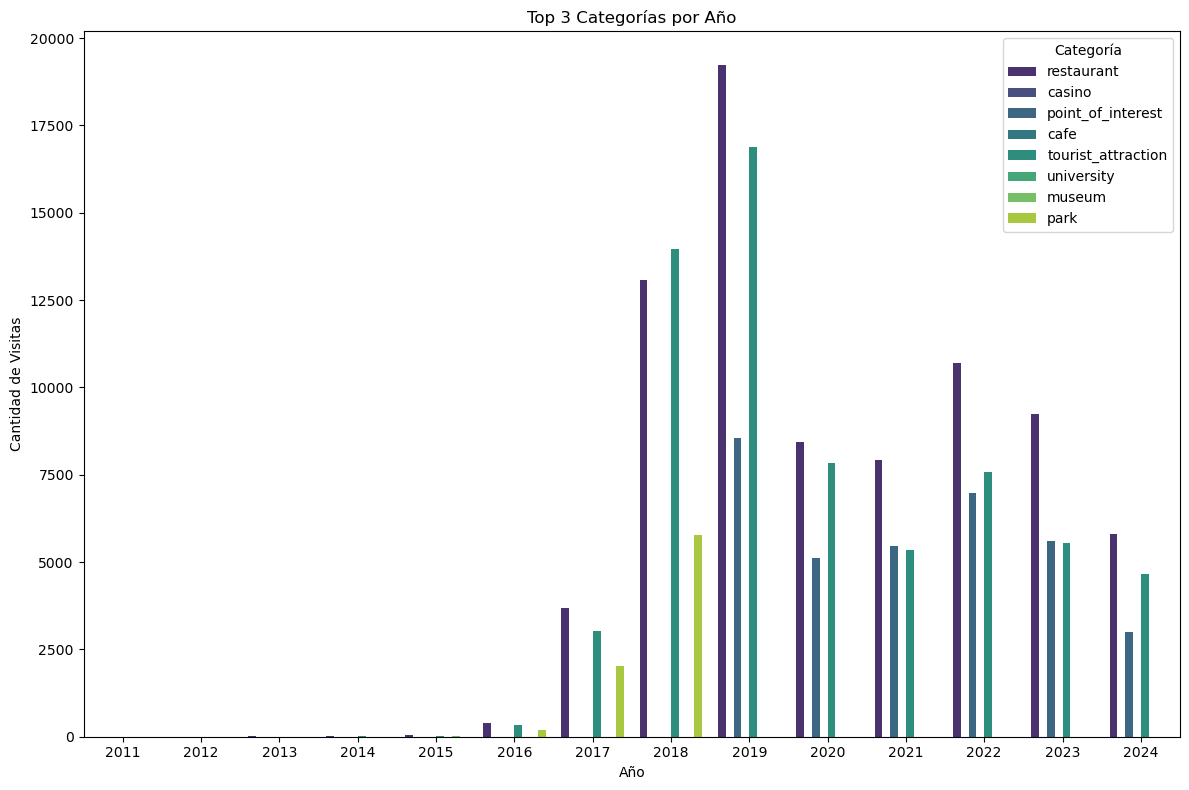

In [76]:
# Top 3 categorías por año
top_categorias_por_anio = df_base.groupby(['year', 'category'])['place_name'].count().reset_index(name='cantidad_visitas')
top_categorias_por_anio = top_categorias_por_anio.sort_values(by=['year', 'cantidad_visitas'], ascending=[True, False])

# Filtrar el Top 3 de categorías para cada año
top_3_por_anio = top_categorias_por_anio.groupby('year').head(3)

# Visualización
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=top_3_por_anio, x='year', y='cantidad_visitas', hue='category', palette='viridis')
plt.title("Top 3 Categorías por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Visitas")
plt.legend(title='Categoría', loc='upper right')
plt.tight_layout()
plt.show()


- 2018-2019: Durante estos años de mayor actividad, las categorías "restaurant", "tourist_attraction", y "park" dominaron en términos de visitas. Esto sugiere que estas categorías son consistentes en su popularidad.

- En 2020, como era de esperarse, las visitas caen drásticamente en todas las categorías, debido al impacto de la pandemia de COVID-19. Las categorías más recreativas (como "restaurant" y "tourist_attraction") parecen haber sido las más afectadas.
  
- En los años posteriores (2021-2022), las visitas comienzan a recuperarse. "Restaurant" vuelve a liderar, lo que podría deberse a la reactivación del sector gastronómico. "Park" se mantiene como una de las categorías más visitadas, probablemente porque los espacios al aire libre fueron preferidos durante el periodo post-pandemia.


**Otras observaciones:**

- Aunque "restaurant" y "tourist_attraction" han sido categorías constantes en el Top 3, otras categorías, como "park" y "point_of_interest", han alternado en popularidad.

- Es interesante notar la aparición de categorías como "casino" y "museum" en ciertos años, lo que podría reflejar eventos específicos o preferencias locales.

- En 2023 y 2024, las visitas generales han disminuido en comparación con los años anteriores, pero "restaurant" sigue liderando.

- La categoría "park" muestra una caída significativa en comparación con su pico en 2018-2019.

## 4. Red Bipartita

Una red bipartita tiene dos tipos de nodos: usuarios y destinos turísticos, para este caso. Los enlaces entre estos nodos representan interacciones (visitas, reviews) y tienen pesos.

- Nodos del primer conjunto: Usuarios (id_usuario).
- Nodos del segundo conjunto: Destinos turísticos (place_name)

**Pesos de los enlaces: Cantidad de visitas/reviews de un usuario a un destino.**

El objetivo en este análisis es poder modelar las interacciones de la red para poder así generar un sistema de recomendaciones para futuros usuarios.

Dado que la red es muy grande, se trabajarán 3 subconjuntos.

### A. Subconjunto: Usuarios más activos y sus destinos favoritos
Objetivo: Identificar los destinos más frecuentados y bien calificados por los usuarios más activos, ya que estos representan un perfil confiable para futuras recomendaciones.

Top 50 usuarios más activos y destinos únicos visitados:
id_usuario
117105786835826823095    146
117348488032797463906     99
115914855904583969259     92
107728582315216232720     84
112577892605637314396     82
                        ... 
100108463804028915525     47
113139169552299870910     47
108918964911751122681     47
100804031526248960877     47
110848910161135874329     46
Name: place_name, Length: 100, dtype: int64


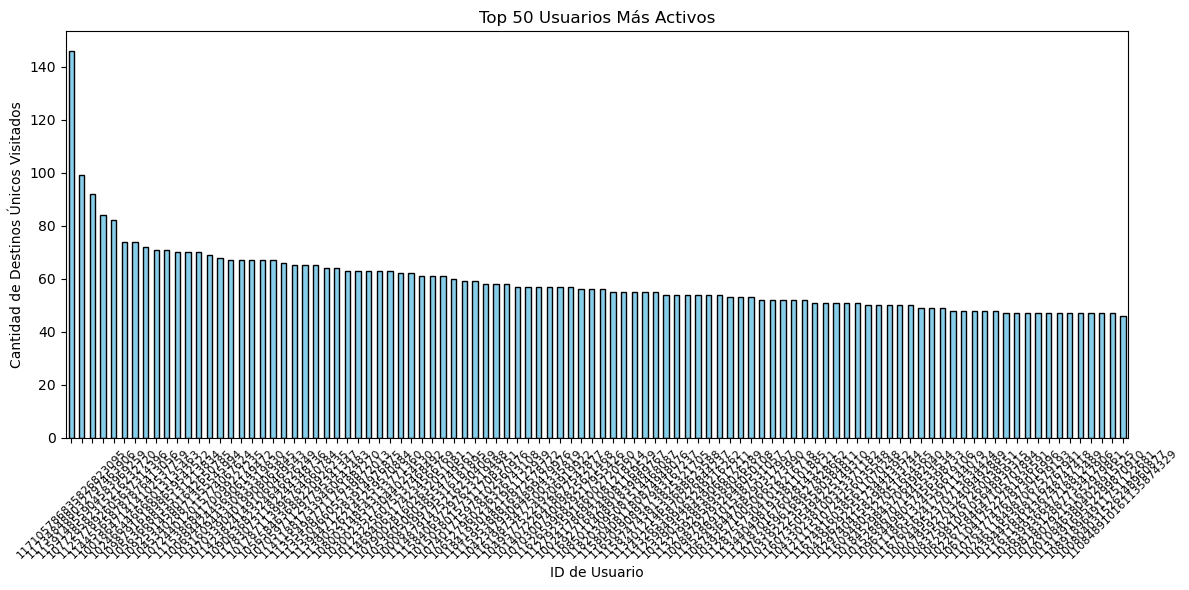

In [168]:
# Contar la cantidad de destinos únicos visitados por cada usuario
usuarios_activos = df_base.groupby('id_usuario')['place_name'].nunique()

# Ordenar por cantidad de destinos visitados y seleccionar el top 100
top_usuarios_activos = usuarios_activos.sort_values(ascending=False).head(100)

# Mostrar el resultado
print("Top 50 usuarios más activos y destinos únicos visitados:")
print(top_usuarios_activos)

# Visualización del top 100
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_usuarios_activos.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 50 Usuarios Más Activos")
plt.xlabel("ID de Usuario")
plt.ylabel("Cantidad de Destinos Únicos Visitados")
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()


In [170]:
# Filtrar usuarios que han visitado más de 45 destinos únicos
usuarios_activos = df_base.groupby('id_usuario')['place_name'].nunique()
usuarios_activos = usuarios_activos[usuarios_activos > 45].index

# Crear el subconjunto de datos
subconjunto_usuarios_activos = df_base[df_base['id_usuario'].isin(usuarios_activos)]

print(f"Total de usuarios más activos: {len(usuarios_activos)}")
print(f"Total de filas en el subconjunto: {subconjunto_usuarios_activos.shape[0]}")


Total de usuarios más activos: 107
Total de filas en el subconjunto: 6221


In [172]:
import networkx as nx

# Crear un grafo bipartito
B = nx.Graph()

# Agregar nodos de usuarios y destinos
usuarios = subconjunto_usuarios_activos['id_usuario'].unique()
destinos = subconjunto_usuarios_activos['place_name'].unique()

B.add_nodes_from(usuarios, bipartite=0, tipo='usuario')  # Nodos de tipo 'usuario'
B.add_nodes_from(destinos, bipartite=1, tipo='destino')  # Nodos de tipo 'destino'

# Agregar enlaces con pesos según el número de visitas
for _, row in subconjunto_usuarios_activos.iterrows():
    usuario = row['id_usuario']
    destino = row['place_name']
    if B.has_edge(usuario, destino):
        B[usuario][destino]['weight'] += 1
    else:
        B.add_edge(usuario, destino, weight=1)

# Resumen de la red
print(f"Número total de nodos: {len(B.nodes)}")
print(f"Número total de enlaces: {len(B.edges)}")


Número total de nodos: 971
Número total de enlaces: 6215


**Datos generales de la red bipartita:**

- Usuarios más activos considerados: 107 usuarios que han visitado al menos un número significativo de destinos (más de 45).
- Destinos: 864 destinos únicos en el subconjunto.
- Total de filas: 6.221 conexiones en el subconjunto.
- Número de nodos: 971 (usuarios + destinos).
- Número de enlaces: 6.215 conexiones entre usuarios y destinos.

La red tiene una gran cantidad de nodos y enlaces que es demasiado grande para representarla gráficamente sin filtrar.
Por este motivo, es que exploraremos los destinos más visitados y crearemos una subred más manejable para poder entender tendencias y patrones.

In [175]:
# Top destinos más visitados (grado más alto)
top_destinos = sorted(
    [(nodo, grado) for nodo, grado in B.degree() if B.nodes[nodo]['tipo'] == 'destino'],
    key=lambda x: x[1],
    reverse=True
)[:10]

print("Top 10 destinos más visitados en la red bipartita:")
for destino, conexiones in top_destinos:
    print(f"{destino}: {conexiones} conexiones")


Top 10 destinos más visitados en la red bipartita:
Plaza de Los Ríos: 101 conexiones
Terminal de Buses Valdivia: 88 conexiones
Parque Saval: 86 conexiones
Portal Valdivia: 82 conexiones
Encuentro Costumbrista en la Costa Playa Grande de Niebla: 80 conexiones
"La Cervecería" Kunstmann: 70 conexiones
Feria Fluvial de Valdivia: 69 conexiones
Plaza de la República: 66 conexiones
Chocolatería Entrelagos: 64 conexiones
Casino De Juegos Valdivia S.A.: 63 conexiones


Se filtran los nodos más relevantes para trabajar una subred:

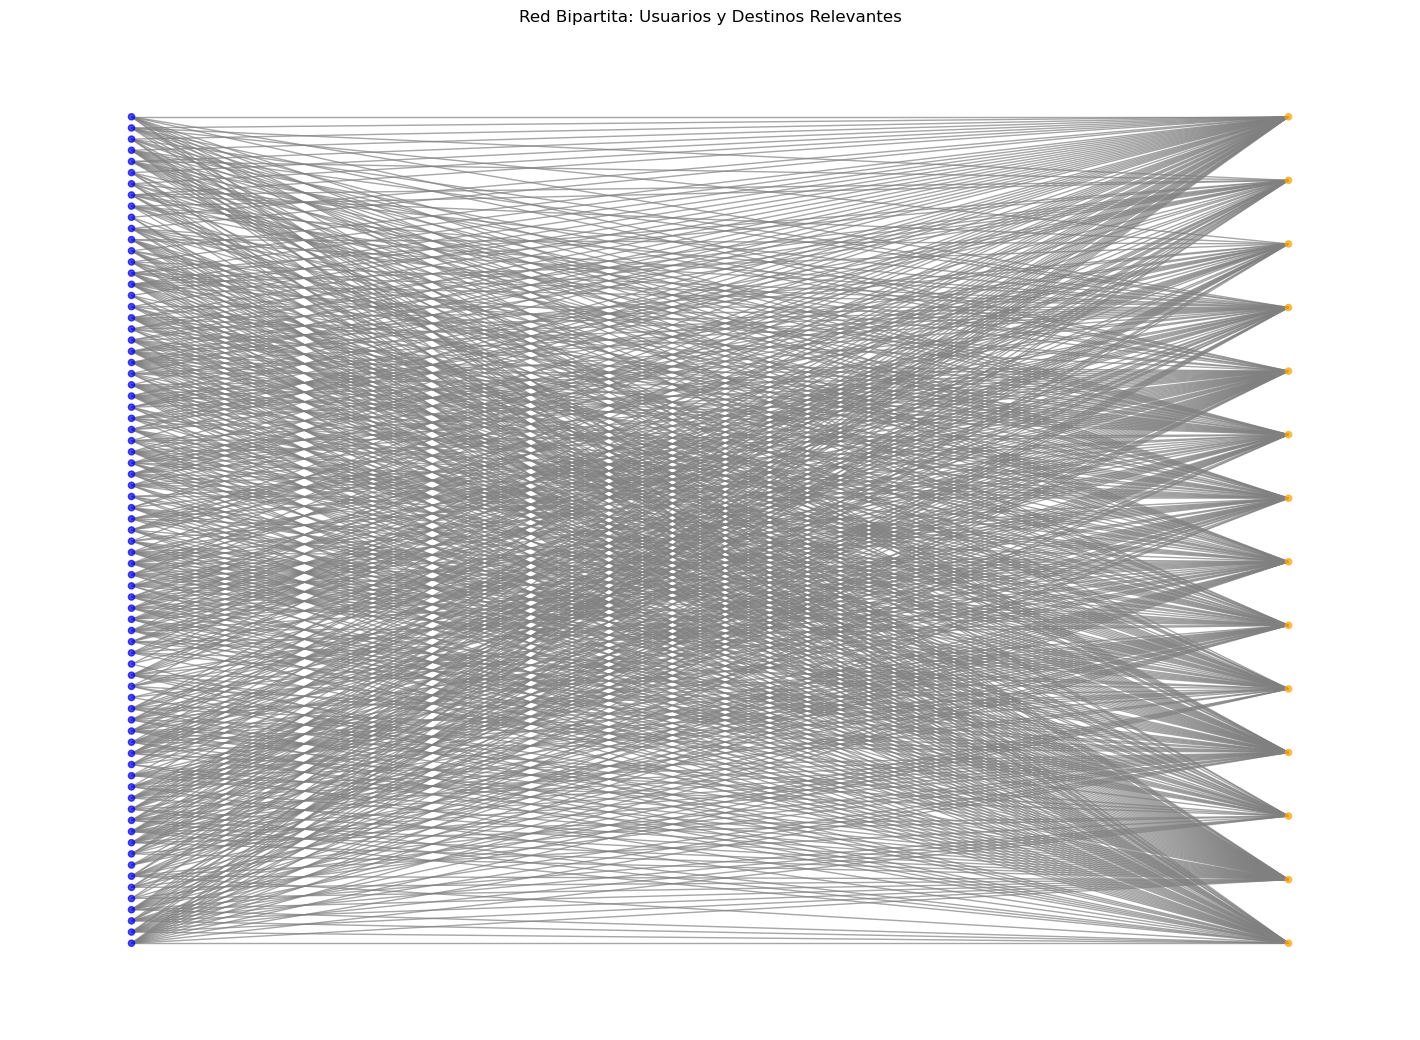

In [177]:
# Filtrar nodos con grado mayor a un umbral 
umbral_grado = 50
nodos_relevantes = [n for n, grado in B.degree() if grado > umbral_grado]
subred = B.subgraph(nodos_relevantes)

# Crear posición específica para nodos bipartitos
usuarios = [n for n, d in subred.nodes(data=True) if d['tipo'] == 'usuario']
destinos = [n for n, d in subred.nodes(data=True) if d['tipo'] == 'destino']
pos = nx.bipartite_layout(subred, usuarios)

# Diferenciar nodos por tipo (colores)
node_colors = ['blue' if n in usuarios else 'orange' for n in subred.nodes()]

# Visualización
plt.figure(figsize=(14, 10))
nx.draw(
    subred,
    pos,
    with_labels=False,
    node_size=20,
    node_color=node_colors,
    edge_color='gray',
    alpha=0.7
)
plt.title("Red Bipartita: Usuarios y Destinos Relevantes")
plt.show()


El gráfico muestra una red bipartita donde los nodos azules representan a los usuarios más activos (top 50) y los nodos naranjas representan los destinos que han visitado. Cada línea (enlace) indica una relación entre un usuario y un destino, basada en las visitas registradas.

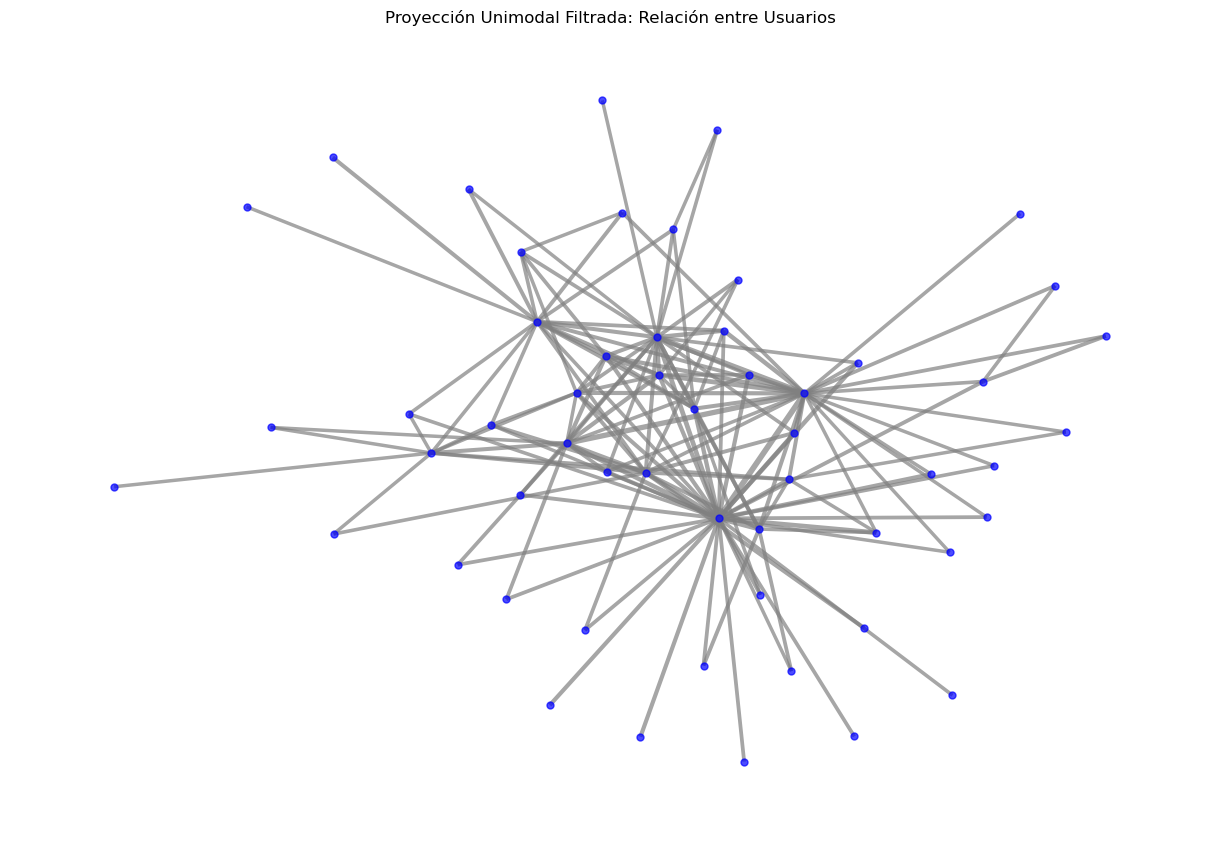

In [204]:
# Filtrar enlaces con peso mayor a 24
umbral_peso = 24
proyeccion_filtrada = nx.Graph(
    (u, v, d) for u, v, d in proyeccion_usuarios.edges(data=True) if d['weight'] > umbral_peso
)

# Visualizar la red proyectada filtrada
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(proyeccion_filtrada, seed=42)
nx.draw(
    proyeccion_filtrada,
    pos,
    with_labels=False,
    node_size=25,
    node_color='blue',
    edge_color='gray',
    alpha=0.7,
    width=[d['weight'] * 0.1 for (u, v, d) in proyeccion_filtrada.edges(data=True)]
)
plt.title("Proyección Unimodal Filtrada: Relación entre Usuarios")
plt.show()


**GRADO DE NODOS**

In [206]:
# Calcular grado de los nodos
grados = dict(proyeccion_filtrada.degree())
# Ordenar por grado descendente
grados_ordenados = sorted(grados.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodos con mayor grado:")
for nodo, grado in grados_ordenados[:10]:
    print(f"Usuario: {nodo}, Grado: {grado}")


Top 10 nodos con mayor grado:
Usuario: 117105786835826823095, Grado: 36
Usuario: 115914855904583969259, Grado: 27
Usuario: 107728582315216232720, Grado: 22
Usuario: 104534028871355545994, Grado: 17
Usuario: 112577892605637314396, Grado: 15
Usuario: 100186471414102537759, Grado: 13
Usuario: 107059711297795341347, Grado: 10
Usuario: 104957752249206919922, Grado: 10
Usuario: 105636688335131213834, Grado: 10
Usuario: 107244012015774067624, Grado: 10


El top 10 de nodos con mayor grado son los usuarios que comparten destinos con más personas. Estos usuarios corresponden a los "hubs" sociales, visitando destinos populares que conectan a varias personas.

**CENTRALIDAD DE INTERMEDIACIÒN**

In [209]:
# Calcular centralidad de intermediación
intermediacion = nx.betweenness_centrality(proyeccion_filtrada)
# Ordenar por centralidad descendente
intermediacion_ordenada = sorted(intermediacion.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodos por centralidad de intermediación:")
for nodo, valor in intermediacion_ordenada[:10]:
    print(f"Usuario: {nodo}, Centralidad: {valor:.4f}")


Top 10 nodos por centralidad de intermediación:
Usuario: 117105786835826823095, Centralidad: 0.4386
Usuario: 115914855904583969259, Centralidad: 0.2242
Usuario: 107728582315216232720, Centralidad: 0.1501
Usuario: 104534028871355545994, Centralidad: 0.1368
Usuario: 112577892605637314396, Centralidad: 0.1009
Usuario: 107059711297795341347, Centralidad: 0.0561
Usuario: 100186471414102537759, Centralidad: 0.0553
Usuario: 103160944330833319830, Centralidad: 0.0162
Usuario: 114118817339460642483, Centralidad: 0.0160
Usuario: 104957752249206919922, Centralidad: 0.0153


La centralidad de intermediación mide cuántas veces pasa un nodo por los caminos más cortos entre otros nodos. Identifica nodos clave para la estructura de la red. Estos usuarios con alta centralidad de intermediación actúan como puentes entre diferentes grupos de usuarios con destinos comunes.

**COMUNIDADES**

In [214]:
from networkx.algorithms.community import greedy_modularity_communities

# Detección de comunidades
comunidades = list(greedy_modularity_communities(proyeccion_filtrada))
print(f"Se identificaron {len(comunidades)} comunidades.")
for i, comunidad in enumerate(comunidades[:5]):  # Mostrar las 5 comunidades más grandes
    print(f"Comunidad {i+1}: {len(comunidad)} nodos")


Se identificaron 4 comunidades.
Comunidad 1: 17 nodos
Comunidad 2: 16 nodos
Comunidad 3: 11 nodos
Comunidad 4: 11 nodos


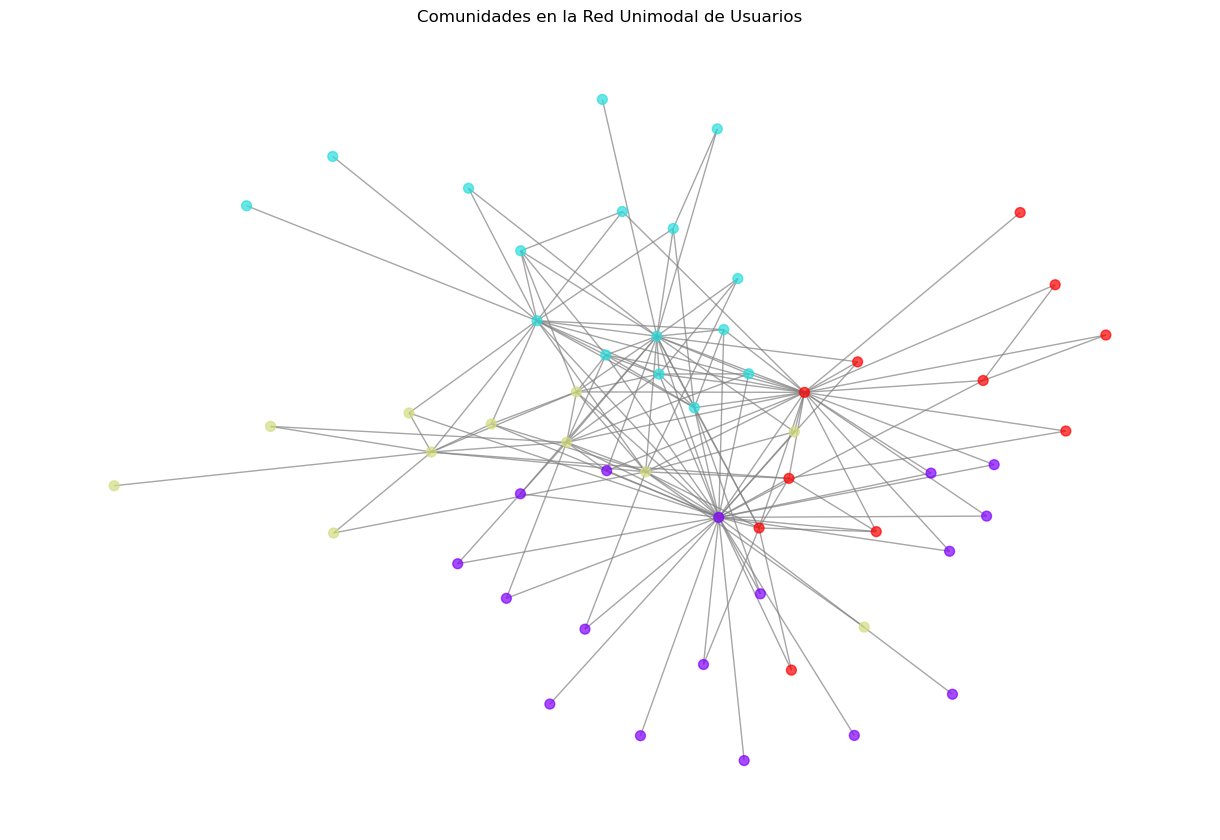

In [218]:
from matplotlib import cm
import numpy as np

colores = cm.rainbow(np.linspace(0, 1, len(comunidades)))
color_map = {}
for i, comunidad in enumerate(comunidades):
    for nodo in comunidad:
        color_map[nodo] = colores[i]

# Dibujar red con colores para cada comunidad
plt.figure(figsize=(12, 8))
nx.draw(
    proyeccion_filtrada,
    pos,
    with_labels=False,
    node_size=50,
    node_color=[color_map[nodo] for nodo in proyeccion_filtrada.nodes],
    edge_color='gray',
    alpha=0.7
)
plt.title("Comunidades en la Red Unimodal de Usuarios")
plt.show()


Se observa que los usuarios se agrupan en comunidades, lo que indica que hay patrones específicos de co-visitas a destinos.
Las comunidades reflejan usuarios que tienden a visitar destinos comunes o que comparten intereses específicos.

In [222]:
# Obtener enlaces con mayor peso
pesos = nx.get_edge_attributes(proyeccion_filtrada, 'weight')
pesos_ordenados = sorted(pesos.items(), key=lambda x: x[1], reverse=True)
print("Top 10 enlaces por peso:")
for (nodo1, nodo2), peso in pesos_ordenados[:10]:
    print(f"Enlace: {nodo1} - {nodo2}, Peso: {peso}")


Top 10 enlaces por peso:
Enlace: 115914855904583969259 - 117105786835826823095, Peso: 41
Enlace: 115914855904583969259 - 107728582315216232720, Peso: 39
Enlace: 115914855904583969259 - 100186471414102537759, Peso: 38
Enlace: 117105786835826823095 - 114118817339460642483, Peso: 35
Enlace: 115914855904583969259 - 105636688335131213834, Peso: 34
Enlace: 117105786835826823095 - 107728582315216232720, Peso: 34
Enlace: 117105786835826823095 - 113554987711761887270, Peso: 33
Enlace: 105636688335131213834 - 114455658787876413056, Peso: 33
Enlace: 115914855904583969259 - 107033904019908063845, Peso: 32
Enlace: 117105786835826823095 - 100186471414102537759, Peso: 32


Las conexiones más fuertes reflejan pares de usuarios que frecuentan destinos similares, lo que sugiere afinidades en preferencias de viaje. Este dato podría ser utilizado para recomendaciones colaborativas.

In [235]:
from community import community_louvain

# Detectar comunidades en la red unimodal filtrada
particion = community_louvain.best_partition(proyeccion_filtrada)

# Mostrar un ejemplo de cómo luce la partición
print(list(particion.items())[:5])  # Muestra los primeros 5 nodos con sus comunidades


[('107638596168627828662', 0), ('115914855904583969259', 0), ('117105786835826823095', 3), ('107059711297795341347', 2), ('104957752249206919922', 1)]


In [239]:
# Asociar comunidades a usuarios
df_comunidades = pd.DataFrame({'id_usuario': list(particion.keys()), 'comunidad': list(particion.values())})

# Unir datos de comunidad con el dataframe original
df_comunidades_merge = pd.merge(df_base, df_comunidades, on='id_usuario')

# Categorías predominantes por comunidad
categorias_por_comunidad = df_comunidades_merge.groupby(['comunidad', 'category'])['place_name'].count().reset_index(name='conteo')

# Calcular el porcentaje de visitas por categoría dentro de cada comunidad
categorias_por_comunidad['porcentaje'] = categorias_por_comunidad.groupby('comunidad')['conteo'].transform(lambda x: (x / x.sum()) * 100)

# Mostrar los resultados para las primeras comunidades
print(categorias_por_comunidad.sort_values(['comunidad', 'conteo'], ascending=[True, False]).head(10))


    comunidad            category  conteo  porcentaje
21          0          restaurant     150   30.120482
20          0   point_of_interest      56   11.244980
26          0  tourist_attraction      55   11.044177
3           0                 bar      46    9.236948
19          0                park      43    8.634538
14          0             lodging      22    4.417671
23          0       shopping_mall      18    3.614458
18          0     natural_feature      17    3.413655
4           0                cafe      11    2.208835
25          0               store      11    2.208835


C:\Users\raval\AppData\Local\Temp\ipykernel_26752\145560034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calificaciones_por_comunidad, x='comunidad', y='calificacion_promedio', palette='coolwarm')


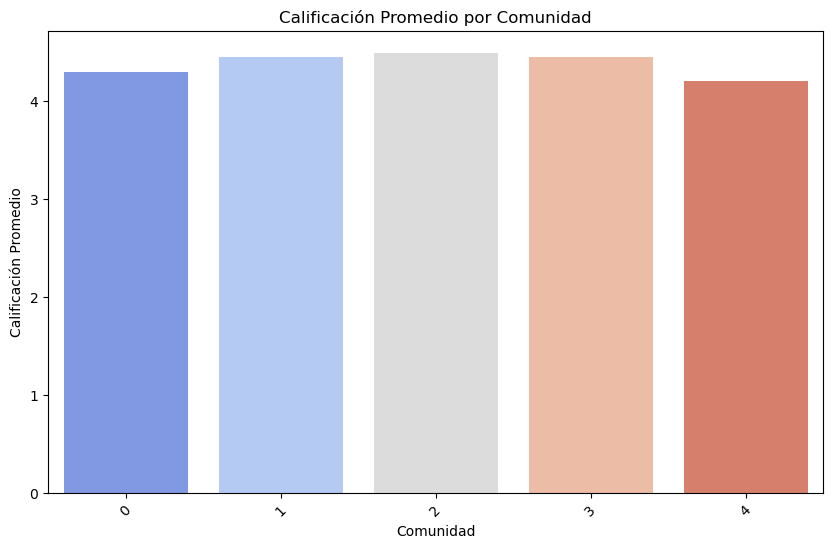

In [241]:
# Calificaciones promedio por comunidad
calificaciones_por_comunidad = df_comunidades_merge.groupby('comunidad')['stars'].mean().reset_index()
calificaciones_por_comunidad.rename(columns={'stars': 'calificacion_promedio'}, inplace=True)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(data=calificaciones_por_comunidad, x='comunidad', y='calificacion_promedio', palette='coolwarm')
plt.title("Calificación Promedio por Comunidad")
plt.xlabel("Comunidad")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45)
plt.show()


In [243]:
# Obtener destinos más visitados por cada comunidad
destinos_por_comunidad = df_comunidades_merge.groupby(['comunidad', 'place_name'])['id_usuario'].count().reset_index(name='conteo')
destinos_por_comunidad = destinos_por_comunidad.sort_values(['comunidad', 'conteo'], ascending=[True, False])

# Crear una lista de recomendaciones para cada usuario
recomendaciones = {}
for usuario, comunidad in df_comunidades.values:
    destinos_visitados = df_base[df_base['id_usuario'] == usuario]['place_name'].unique()
    destinos_comunidad = destinos_por_comunidad[destinos_por_comunidad['comunidad'] == comunidad]['place_name']
    recomendaciones[usuario] = list(set(destinos_comunidad) - set(destinos_visitados))

# Mostrar recomendaciones para los primeros 5 usuarios
for usuario, destinos in list(recomendaciones.items())[:5]:
    print(f"Usuario {usuario}: Recomendaciones: {destinos[:5]}")


Usuario 107638596168627828662: Recomendaciones: ['Restaurant Don Floro', 'Fuente Valdiviana', 'Humedal Angachilla', 'Parque Guillermo Harnecker', 'Salto De La Leona']
Usuario 115914855904583969259: Recomendaciones: ['Restaurant Don Floro', 'Fuente Valdiviana', 'Parque Guillermo Harnecker', 'Salto De La Leona', 'Castillo San Sebastian de la Cruz, Corral. Sistema de fuertes de Valdivia']
Usuario 117105786835826823095: Recomendaciones: ['Valdivia', 'Cementerio Alemán', 'Río Leufucade', 'El ovejo', 'Cruce Paillaco Sur']
Usuario 107059711297795341347: Recomendaciones: ['Restaurant Don Floro', 'Fuente Valdiviana', 'Plaza Fuerte Niebla', 'Portal Valdivia', 'Puerto Solar Transporte Sustentable Work Café']
Usuario 104957752249206919922: Recomendaciones: ['Restaurant Don Floro', 'Pilolcura Lodge', 'LAS ROSAS panadería', 'Lacteos Mafil', 'Quesería']


**CONCLUSIONES**

- Los usuarios más influyentes son aquellos con alto grado (Usuario 117105786835826823095) y alta intermediación. Este grupo ES clave para estrategias de marketing dirigidas, ya que sus conexiones abarcan diferentes comunidades.
- Las conexiones entre usuarios están estructuradas en comunidades, indicando patrones de afinidad basados en intereses compartidos o destinos frecuentados en común.

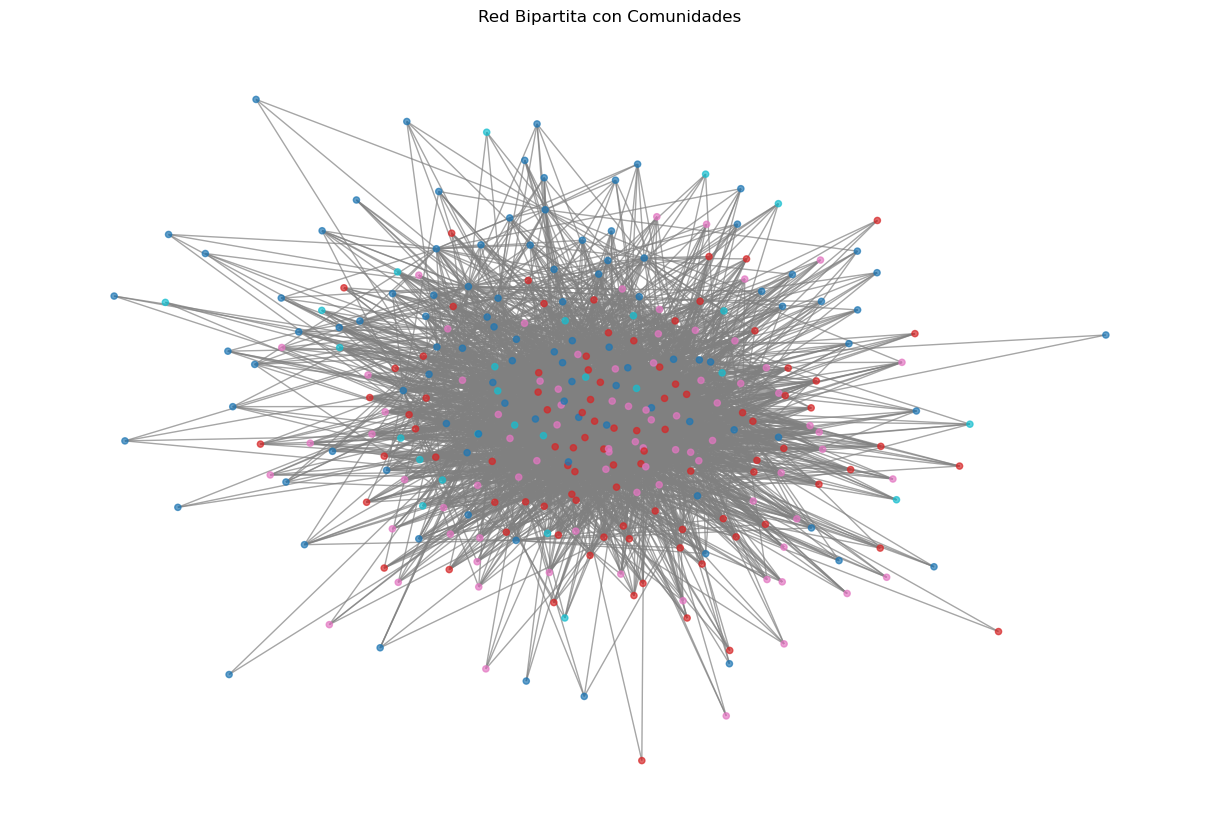

In [160]:
from networkx.algorithms.community import greedy_modularity_communities

# Detectar comunidades
comunidades = list(greedy_modularity_communities(subred))
comunidad_map = {n: i for i, comunidad in enumerate(comunidades) for n in comunidad}

# Asignar colores según comunidades
node_colors = [comunidad_map[n] for n in subred.nodes()]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subred)
nx.draw(
    subred,
    pos,
    with_labels=False,
    node_size=20,
    node_color=node_colors,
    cmap=plt.cm.tab10,
    edge_color='gray',
    alpha=0.7
)
plt.title("Red Bipartita con Comunidades")
plt.show()


### B. Subconjunto: Categorías más populares
Objetivo: Centrarse en las categorías más populares para entender patrones de preferencia general y construir recomendaciones basadas en ellas.

In [241]:
# Identificar las 3 categorías más populares
categorias_populares = df_base['category'].value_counts().head(3).index

# Filtrar datos
subconjunto_categorias = df_base[df_base['category'].isin(categorias_populares)]

print(f"Categorías más populares: {categorias_populares.tolist()}")
print(f"Total de filas en el subconjunto: {subconjunto_categorias.shape[0]}")



Categorías más populares: ['restaurant', 'tourist_attraction', 'point_of_interest']
Total de filas en el subconjunto: 184961


### C. Subconjunto: Destinos clave con alta frecuencia y calificaciones
Objetivo: Enfocarse en los destinos con mayor número de visitas y calificaciones positivas para recomendar lugares altamente valorados.